# QuIC-AI Test Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [1]:
### Import Packages
import importlib as imp
import QuICSeedIF
imp.reload(QuICSeedIF)
import copy
import numpy as np
import tensorflow as tf

In [2]:
### Import Data and Create Objects to Analyze
DATA_DIR = './Data/GrinderClean'
RANDOM_SEED = 7

# Load dataAC
ml_quic = QuICSeedIF.QuICSeedIF()
ml_quic.import_dataset(data_dir=DATA_DIR)
ml_quic.get_dataset_statistics()
test = ml_quic.get_numpy_dataset('raw')

Loading Data from ./Data/GrinderClean
---- Dataset Label Distribution ----
Negative Samples: 6781
False Positive Samples: 239
Positive Samples: 991

---- Well Content Distribution: ----
Data Wells: 7027
Control Wells: 984


## Unsupervised
### KMeans

In [3]:
### Add 2 KMeans Models
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')


KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>


### Spectral Clustering

In [4]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Raw', data_type='raw', tag='Unsupervised')

from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Metrics', data_type='analysis', tag='Unsupervised')

## Supervised Models

### SVM

In [5]:
### SVM
from Models import SVM
ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(file_path='./SavedModels/Analysis/', random_state = 30, model_name='svm'), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')


SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>


### MLP

In [6]:
### MLP
from Models import MLP
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')
print(type(ml_quic.models['MLP Raw'].model))
tf.keras.utils.plot_model(ml_quic.models['MLP Raw'].model, to_file='mlp_arch.png')

\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>
<class 'keras.engine.functional.Functional'>
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Training and Evaluation

### Training

In [7]:
### Train Unsupervised Models
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3, file_loc='./TrainTest')
ml_quic.train_models(tags=['Unsupervised'])

### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0, file_loc='./TrainTest')
ml_quic.train_models(tags = ['Supervised'])

### Unsupervised Evaluation

KMeans Raw:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7020
         pos       0.90      0.43      0.58       991

    accuracy                           0.92      8011
   macro avg       0.91      0.71      0.77      8011
weighted avg       0.92      0.92      0.91      8011

KMeans Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98      7020
         pos       0.80      1.00      0.89       991

    accuracy                           0.97      8011
   macro avg       0.90      0.98      0.94      8011
weighted avg       0.98      0.97      0.97      8011



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Raw:
              precision    recall  f1-score   support

         neg       1.00      0.91      0.95      7020
         pos       0.61      0.97      0.75       991

    accuracy                           0.92      8011
   macro avg       0.80      0.94      0.85      8011
weighted avg       0.95      0.92      0.93      8011



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Metrics:
              precision    recall  f1-score   support

         neg       0.93      0.33      0.48      7020
         pos       0.15      0.82      0.25       991

    accuracy                           0.39      8011
   macro avg       0.54      0.57      0.37      8011
weighted avg       0.83      0.39      0.46      8011

-------- Results on False Positives for KMeans Raw --------
Accuracy on False Positives: 0.8368200836820083
False Positives Account for 6.32% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 26.76923076923077
Average RAF: 0.03788857584615385
Average MPR: 14.150274442179485
Average MS: 1049.1816239410257
Correctly Classified FP Characteristics:
Average Time to Threshold: 37.9858
Average RAF: 0.029968578994999998
Average MPR: 6.835894972829999
Average MS: 496.33249999700007


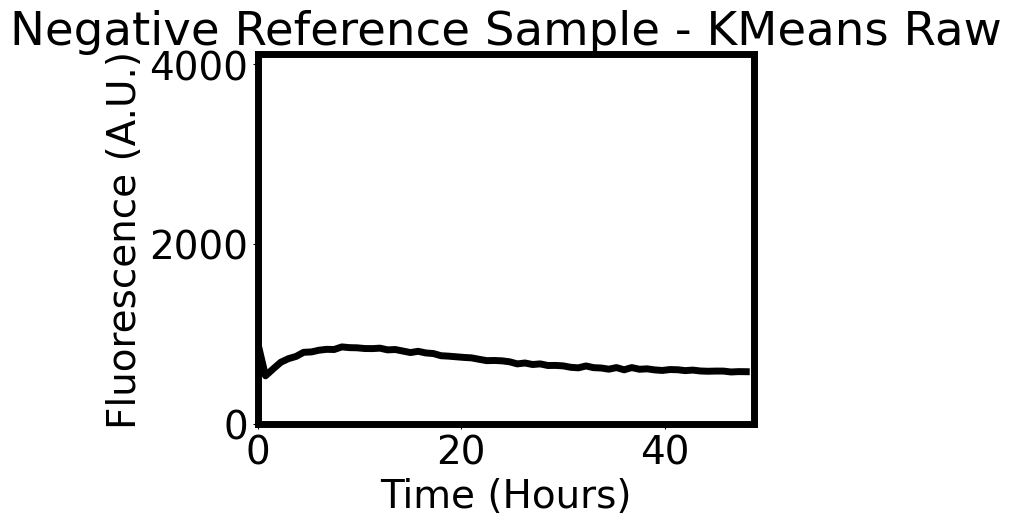

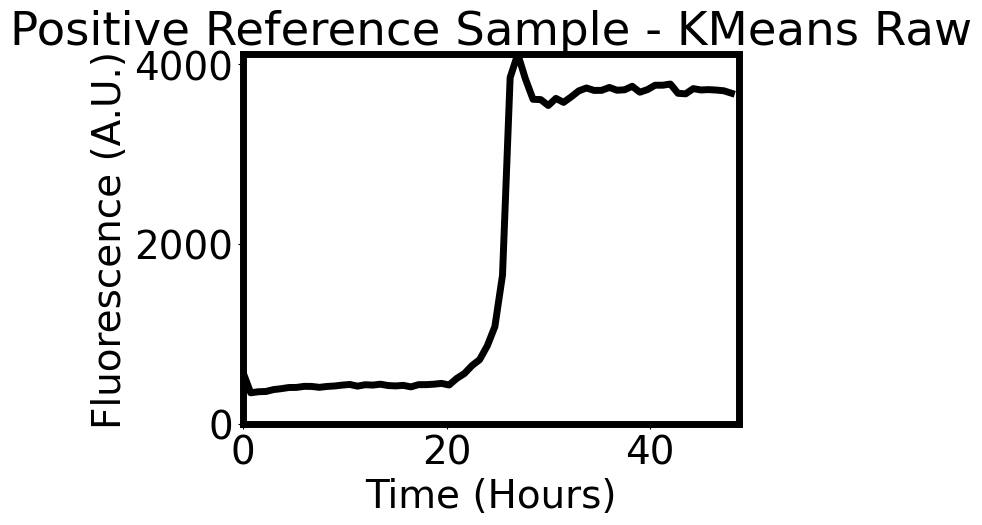

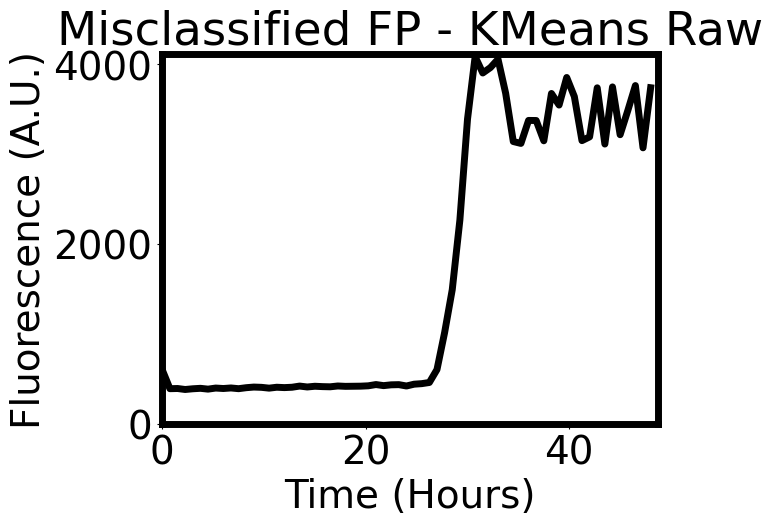

-------- Results on False Positives for KMeans Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 99.17% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 36.15548117154812
Average RAF: 0.031260963418410045
Average MPR: 8.029454802556486
Average MS: 586.5463737786611
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


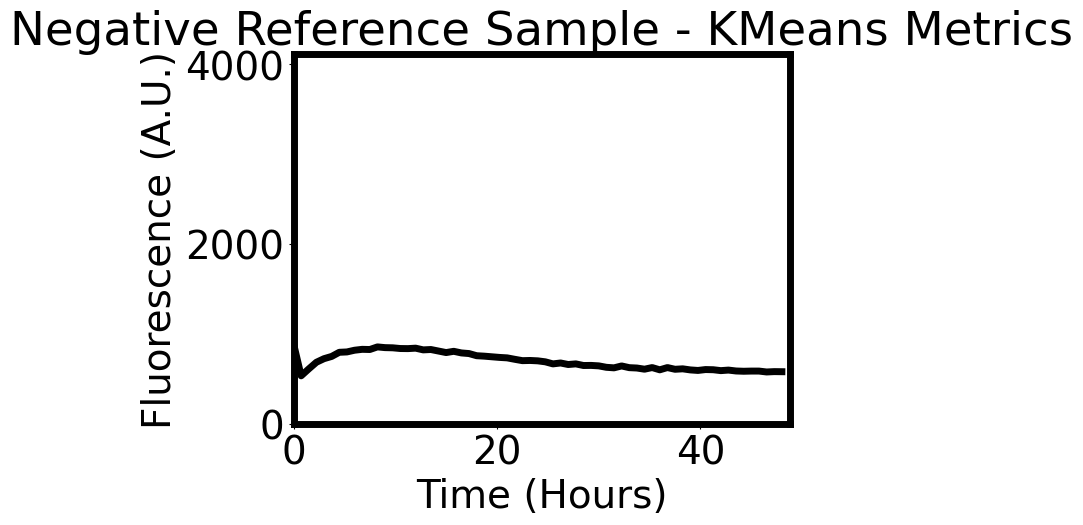

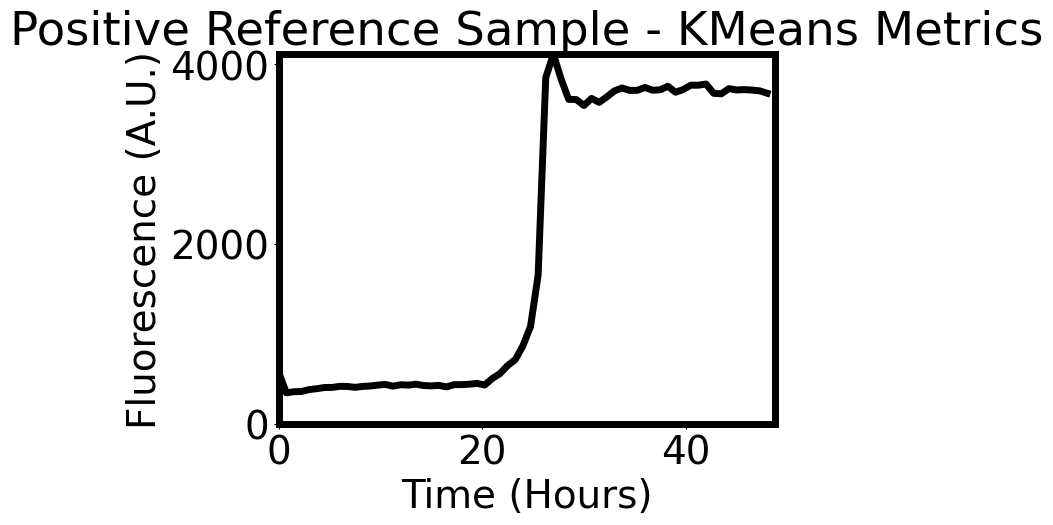

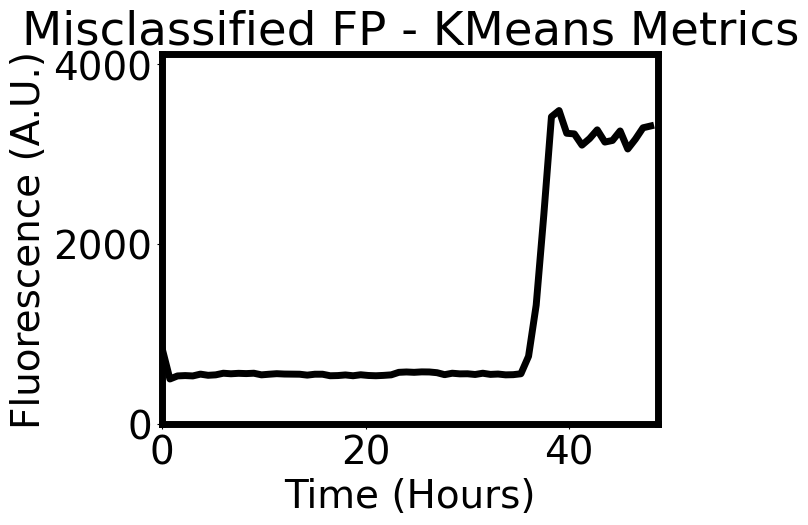

-------- Results on False Positives for Spectral Raw --------
Accuracy on False Positives: 0.23430962343096234
False Positives Account for 27.94% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.059617486338794
Average RAF: 0.03290872826775956
Average MPR: 9.222412732688525
Average MS: 680.7490892519126
Correctly Classified FP Characteristics:
Average Time to Threshold: 43.004464285714285
Average RAF: 0.025876303285714282
Average MPR: 4.131038709446429
Average MS: 278.70535714285717


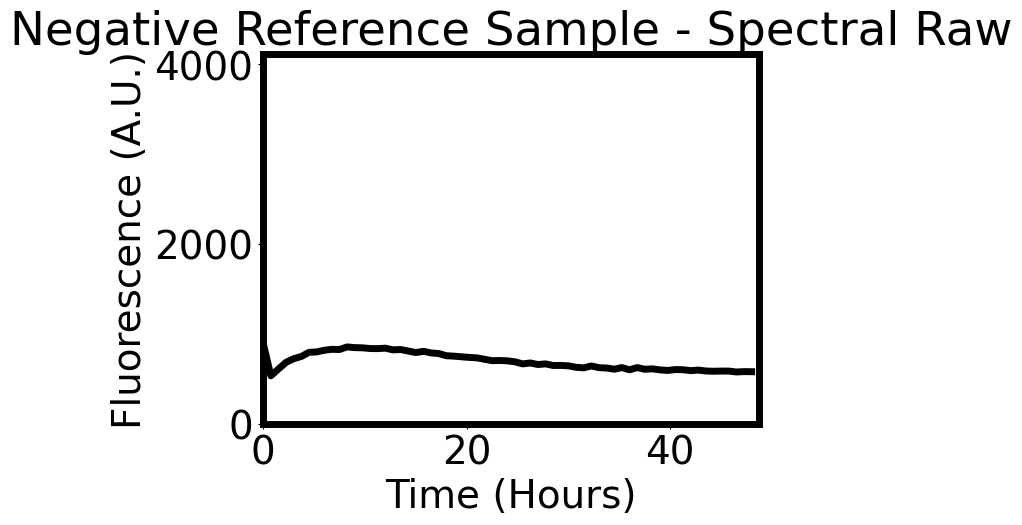

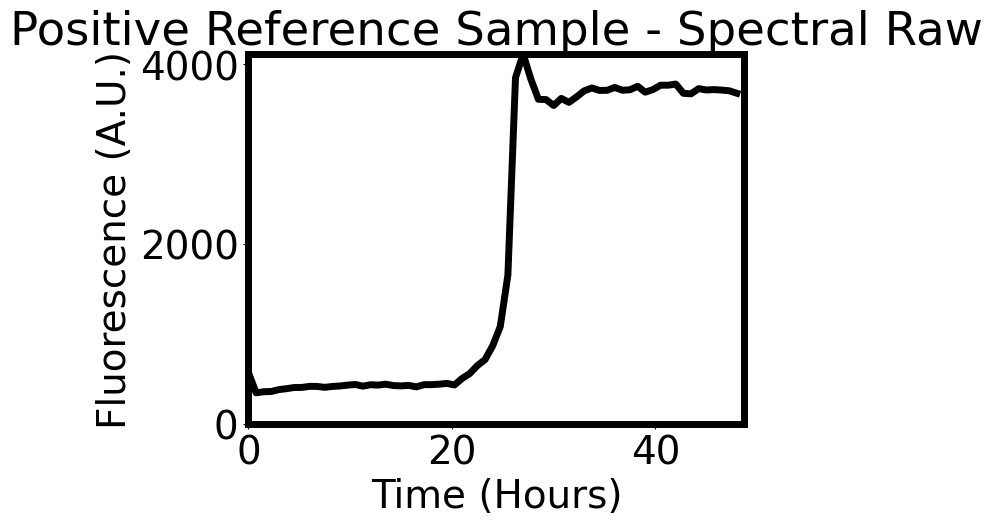

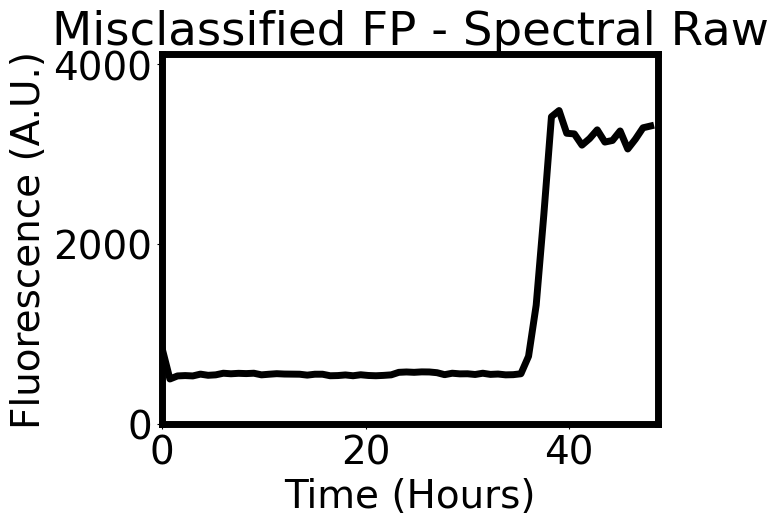

-------- Results on False Positives for Spectral Metrics --------
Accuracy on False Positives: 0.4602510460251046
False Positives Account for 2.63% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.514806201550385
Average RAF: 0.032891333503875964
Average MPR: 10.994606479387597
Average MS: 899.1770025821705
Correctly Classified FP Characteristics:
Average Time to Threshold: 38.07954545454545
Average RAF: 0.029348983954545448
Average MPR: 4.552140563363636
Average MS: 219.91590909090908


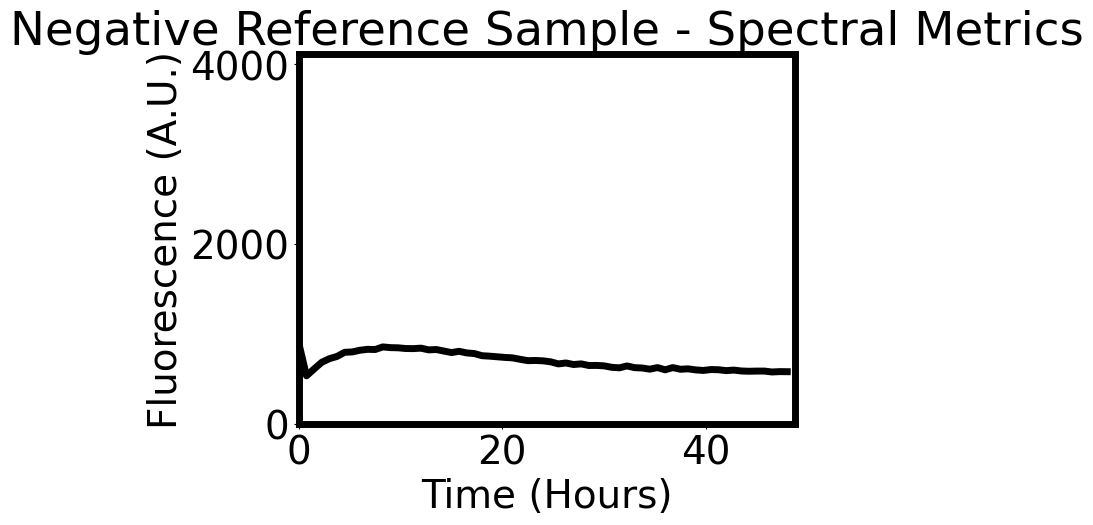

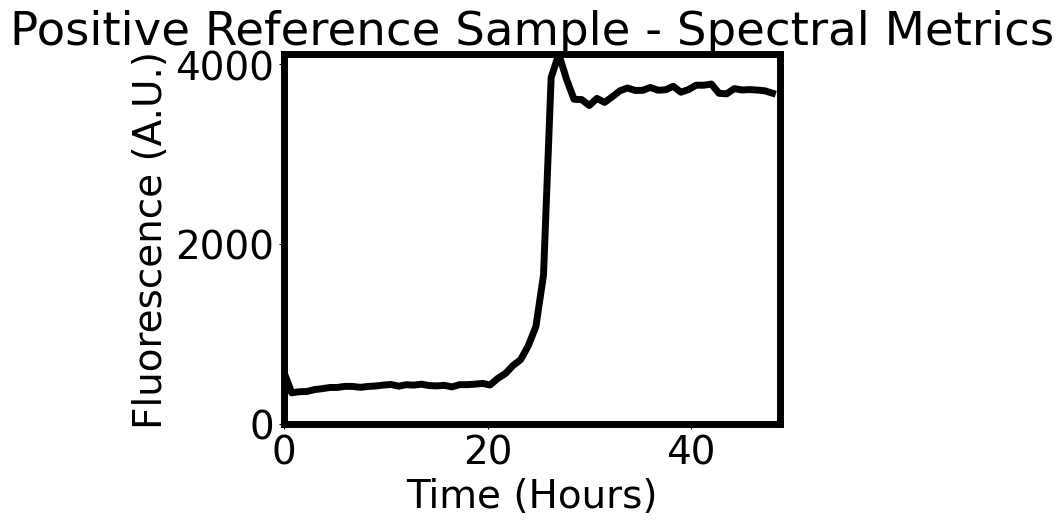

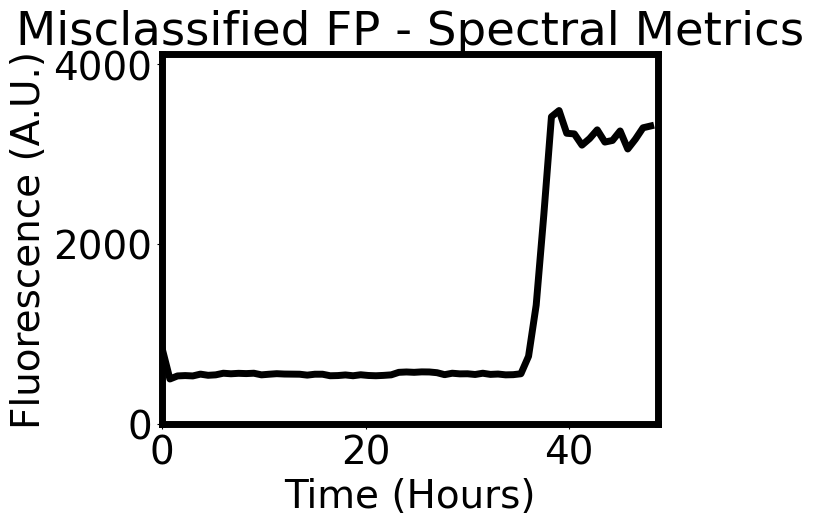

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.097911200807264, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.049054801466195765, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.743839485905147, Max: 54.23108384
MS:
	Min: 61.5, Average: 856.7055163084763, Max: 4282.833333


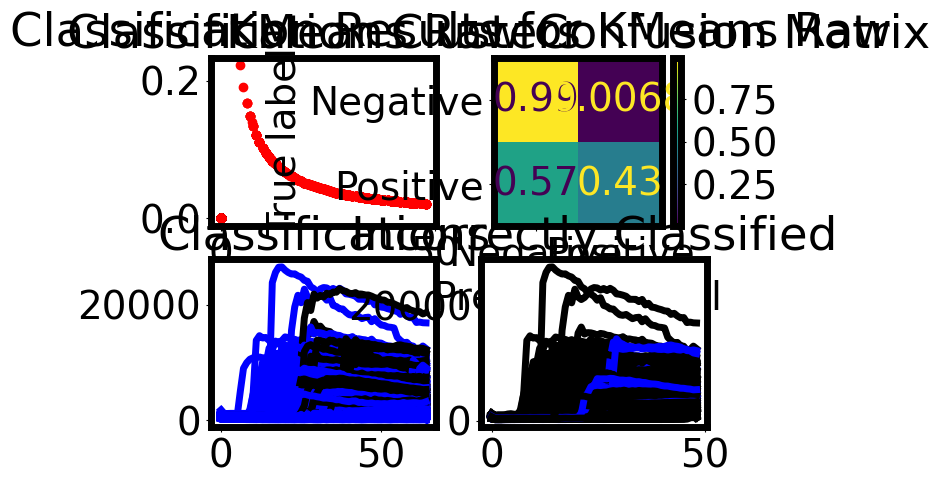

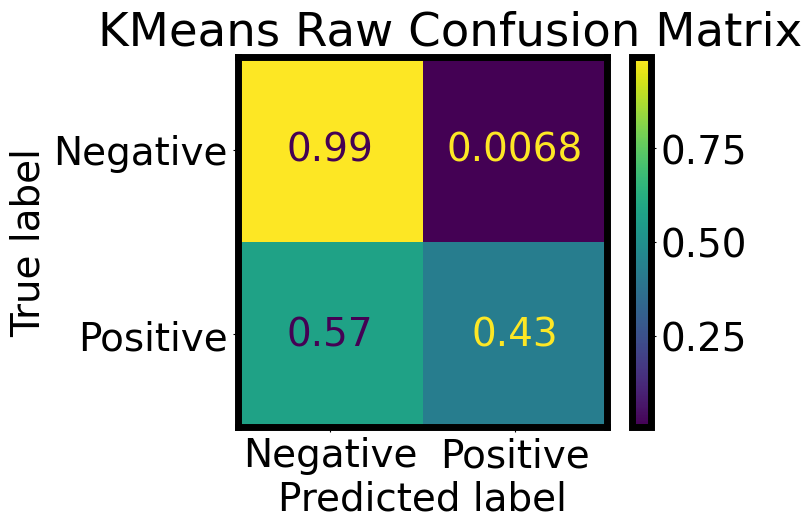

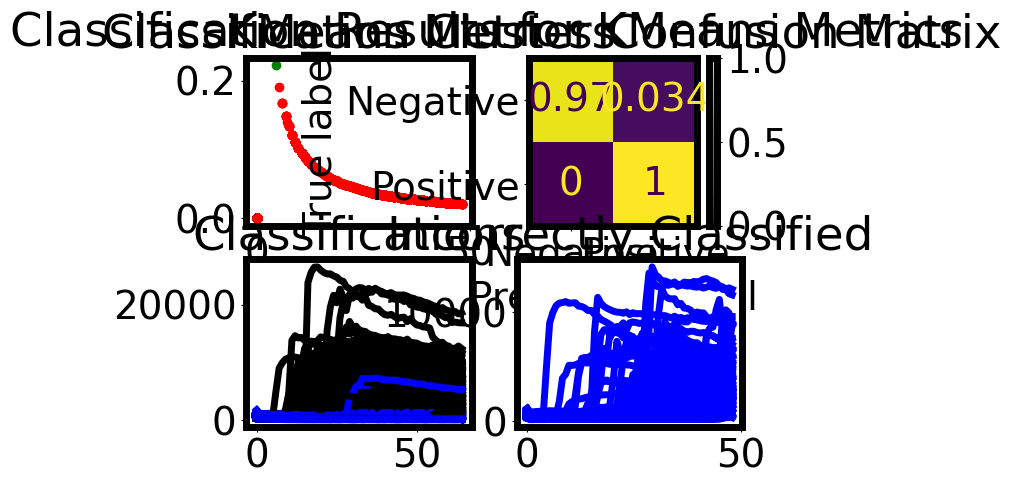

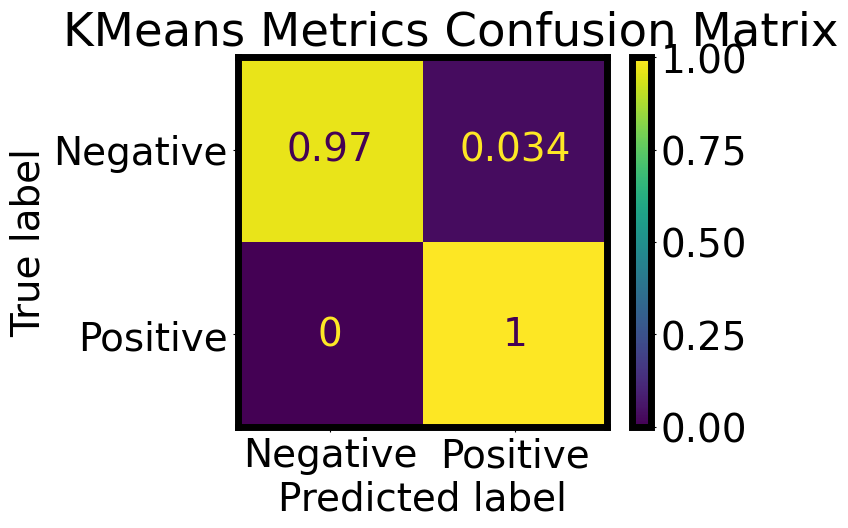

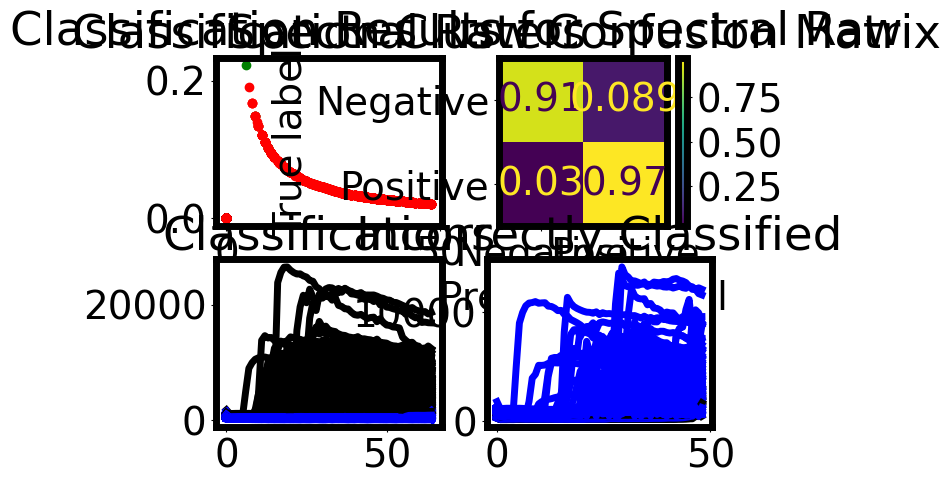

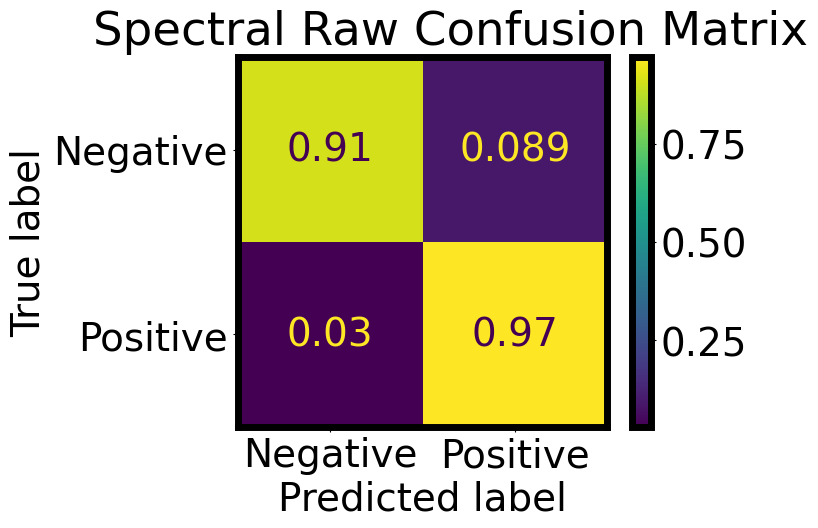

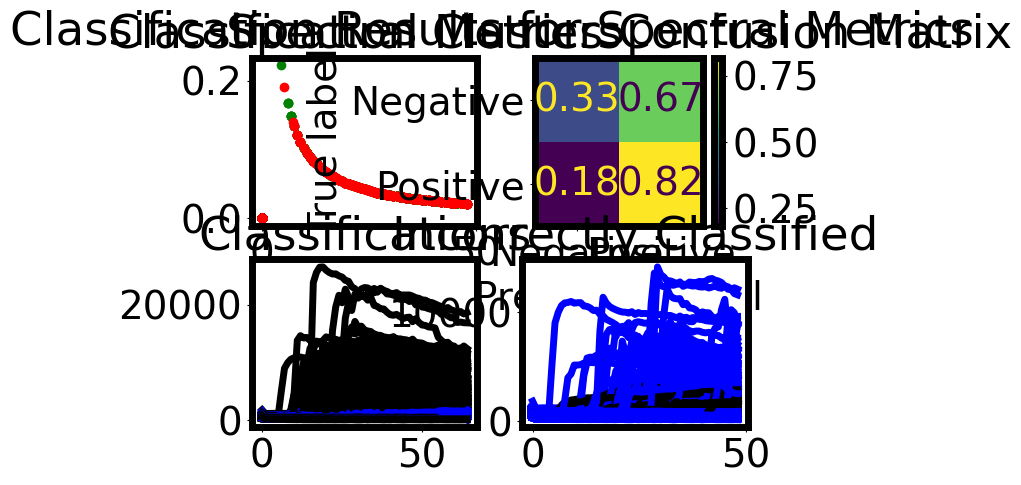

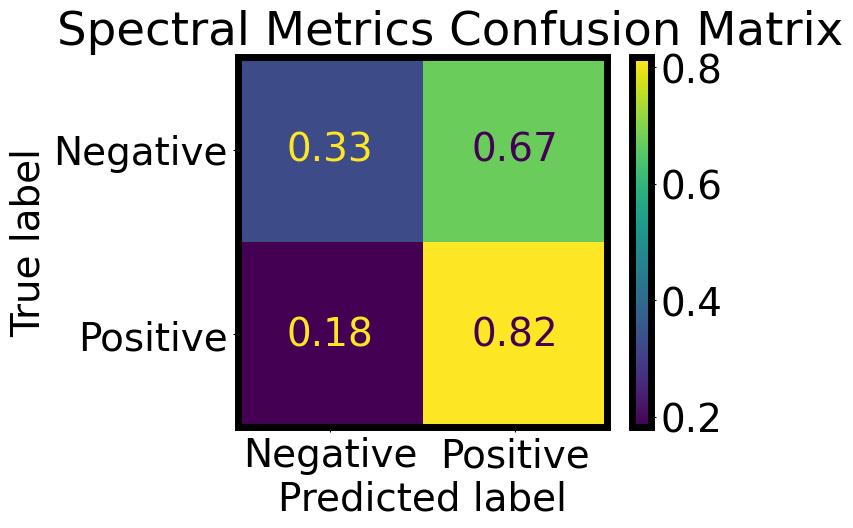

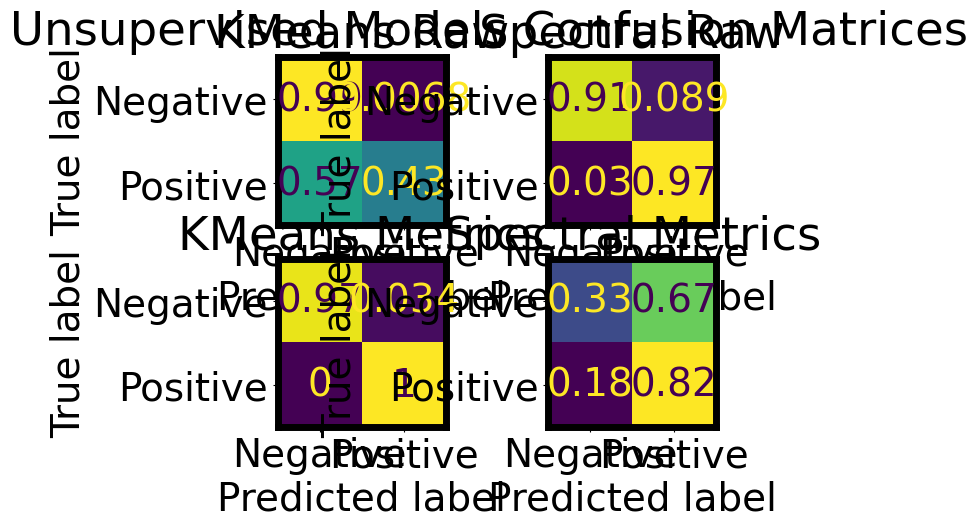

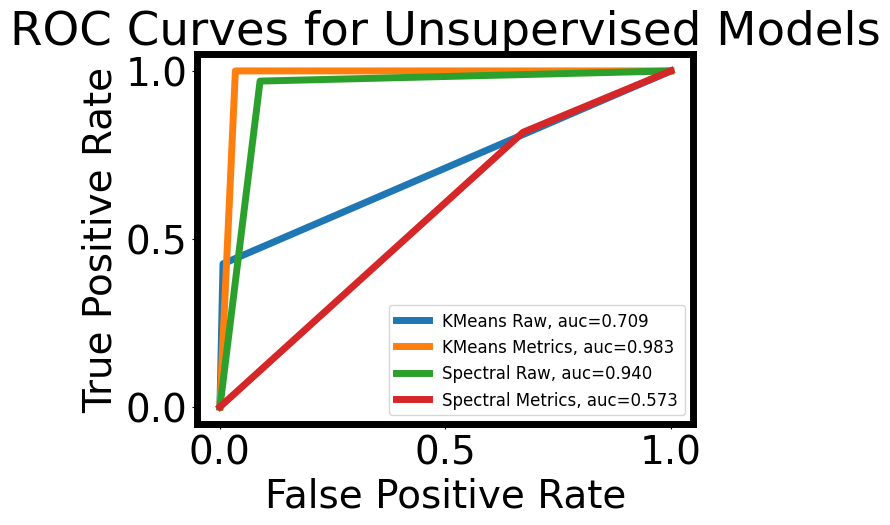

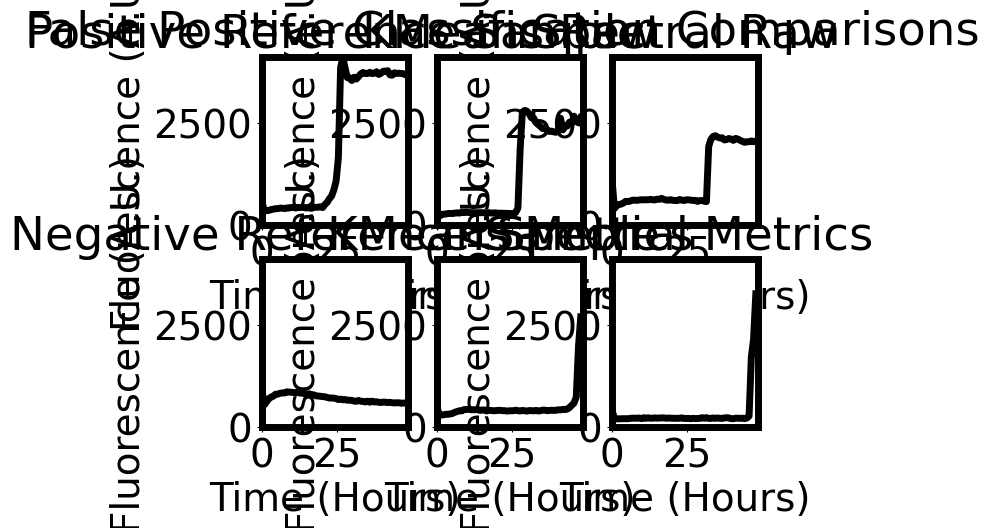

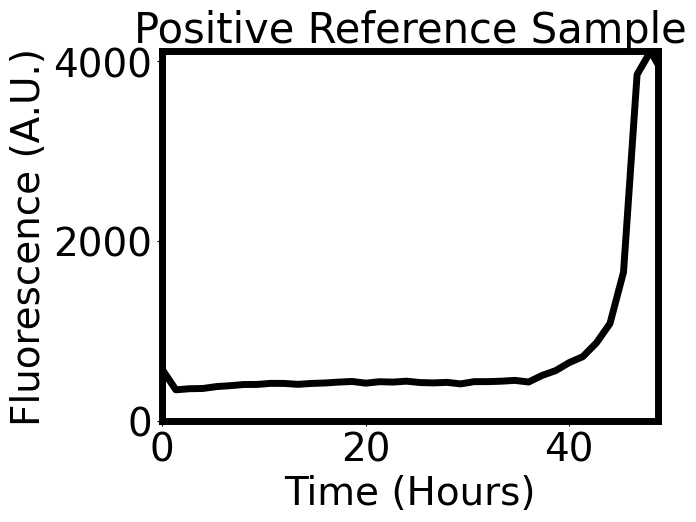

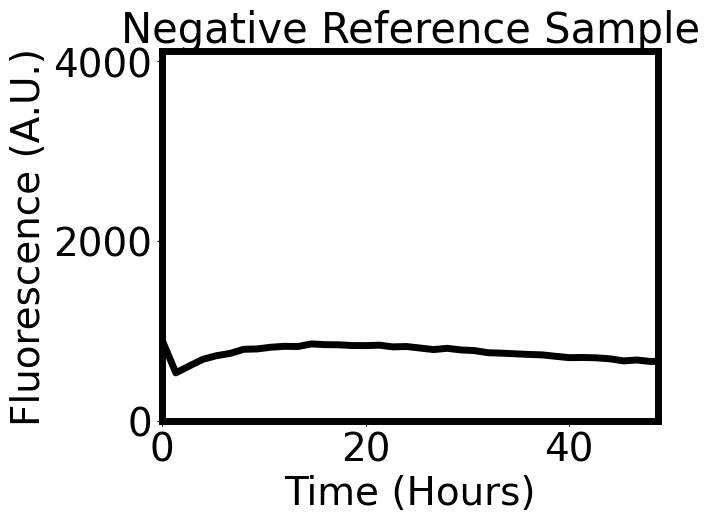

In [8]:
### Get Plots and Scores
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])
ml_quic.get_group_plots_unsupervised(tags = ['Unsupervised'])

### Supervised Evaluation

SVM Raw:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.98       700
         pos       0.88      0.92      0.90       101

    accuracy                           0.97       801
   macro avg       0.93      0.95      0.94       801
weighted avg       0.97      0.97      0.97       801

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.98       700
         pos       0.86      0.92      0.89       101

    accuracy                           0.97       801
   macro avg       0.92      0.95      0.94       801
weighted avg       0.97      0.97      0.97       801

26/26 [==============================] - 2s 1ms/step
MLP Raw:
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99       700
         pos       0.92      0.96      0.94       101

    accuracy                           0.98       801
   macro avg       0.95      0.97      0.96 

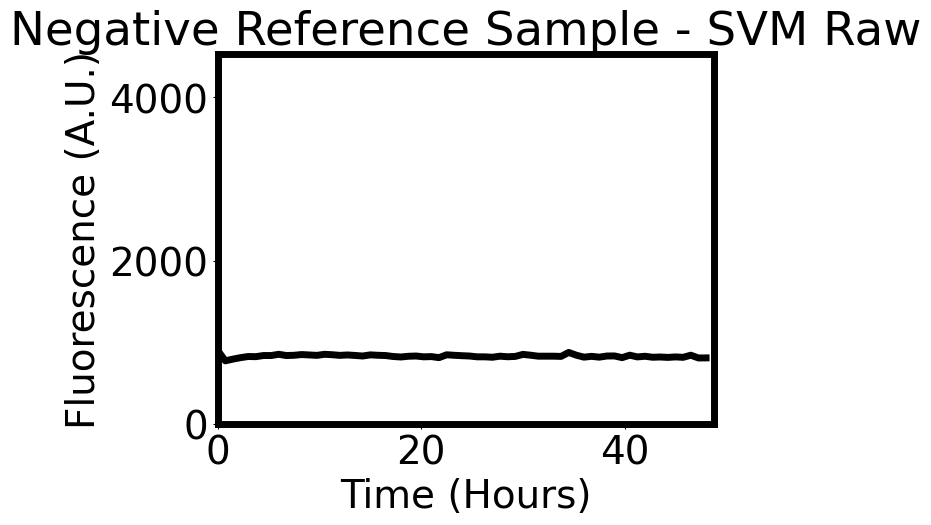

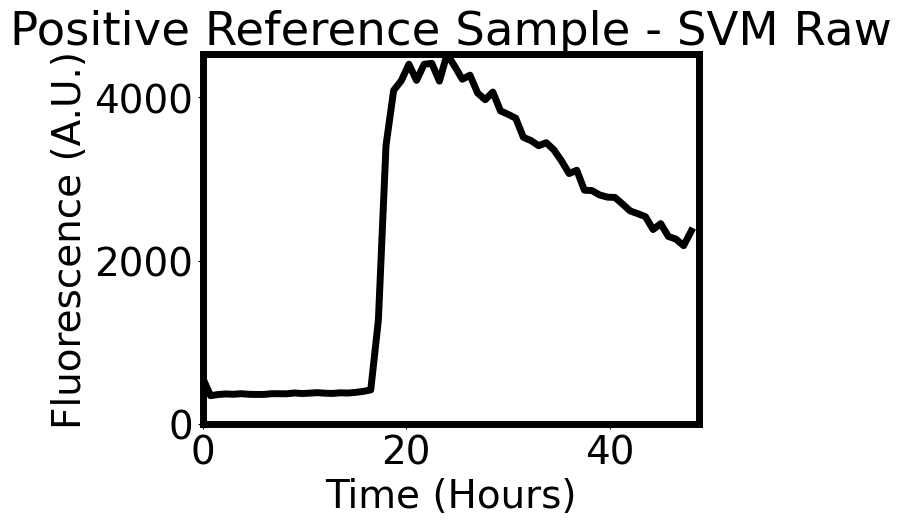

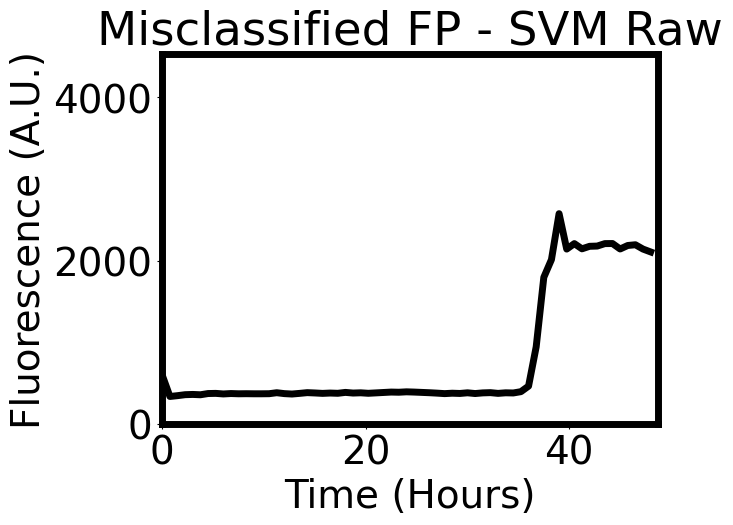

-------- Results on False Positives for SVM Metrics --------
Accuracy on False Positives: 0.2857142857142857
False Positives Account for 65.22% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 30.0
Average RAF: 0.042496811066666675
Average MPR: 7.1773506066
Average MS: 488.02777778
Correctly Classified FP Characteristics:
Average Time to Threshold: 40.0
Average RAF: 0.02531101666666666
Average MPR: 5.324157118333333
Average MS: 459.625


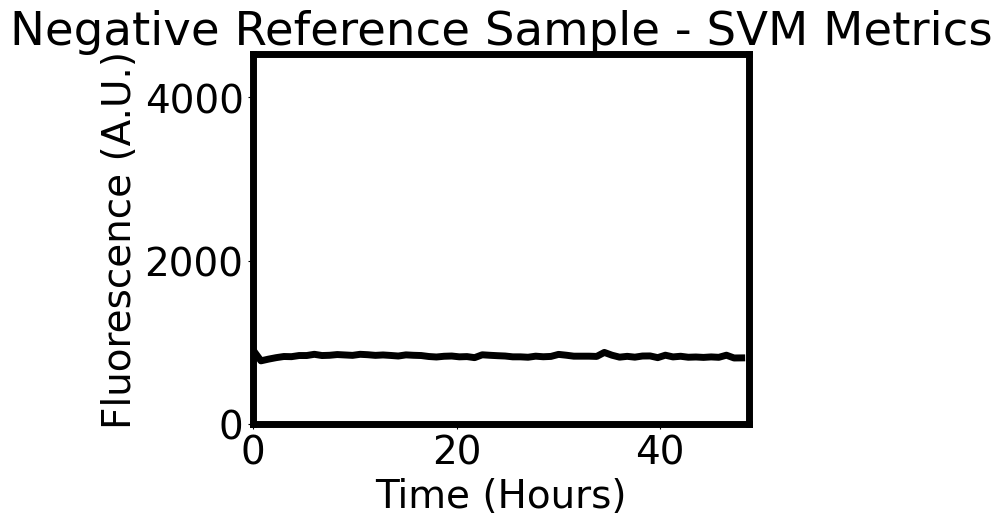

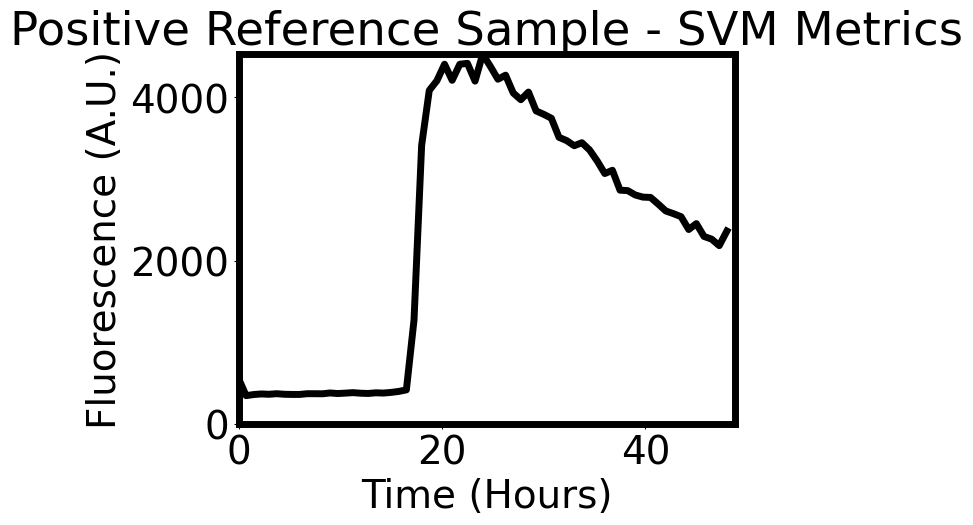

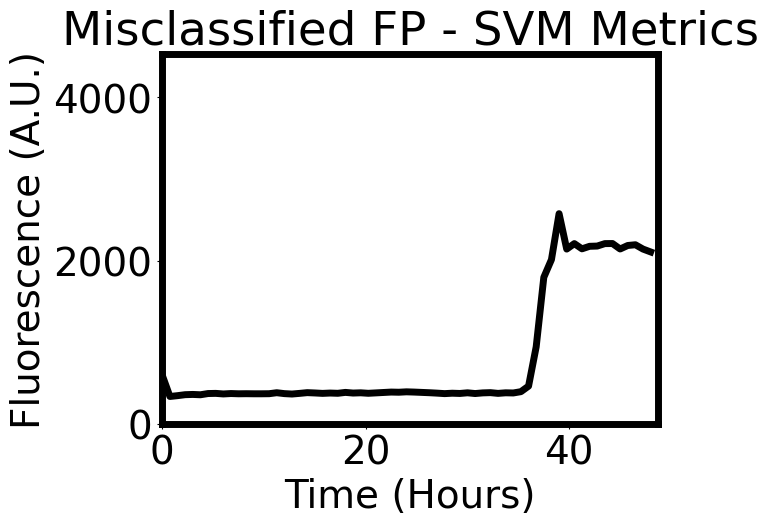

-------- Results on False Positives for MLP Raw --------
26/26 [==============================] - 0s 2ms/step
Accuracy on False Positives: 0.6666666666666666
False Positives Account for 53.85% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 30.107142857142858
Average RAF: 0.045279828857142865
Average MPR: 10.402936868428572
Average MS: 766.6309523857143
Correctly Classified FP Characteristics:
Average Time to Threshold: 34.232142857142854
Average RAF: 0.03373996171428571
Average MPR: 4.770331695
Average MS: 336.55357142857144


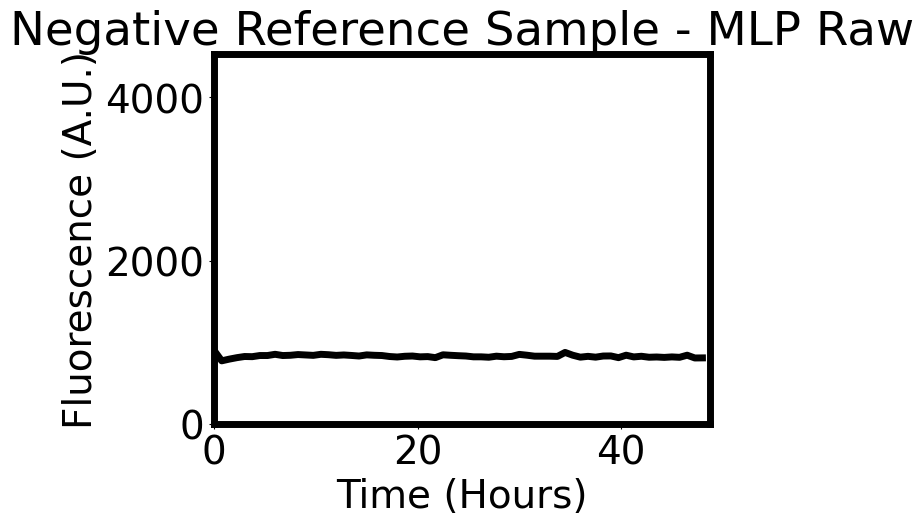

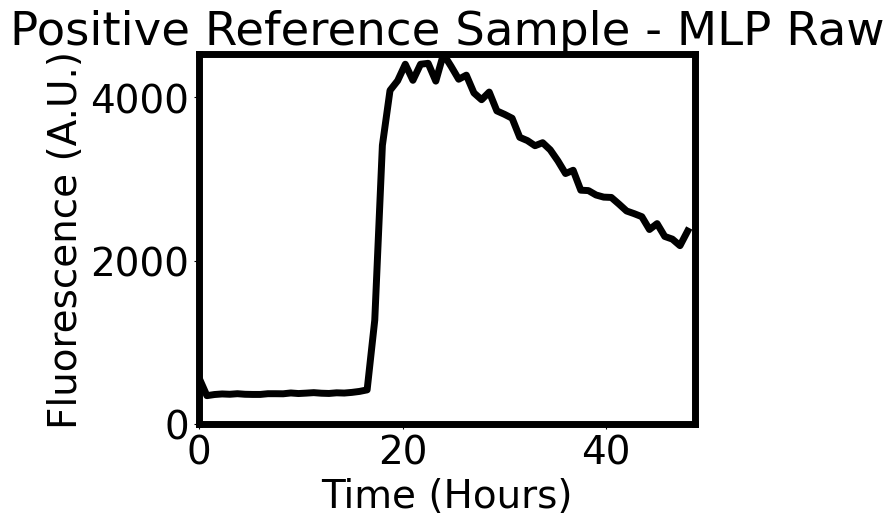

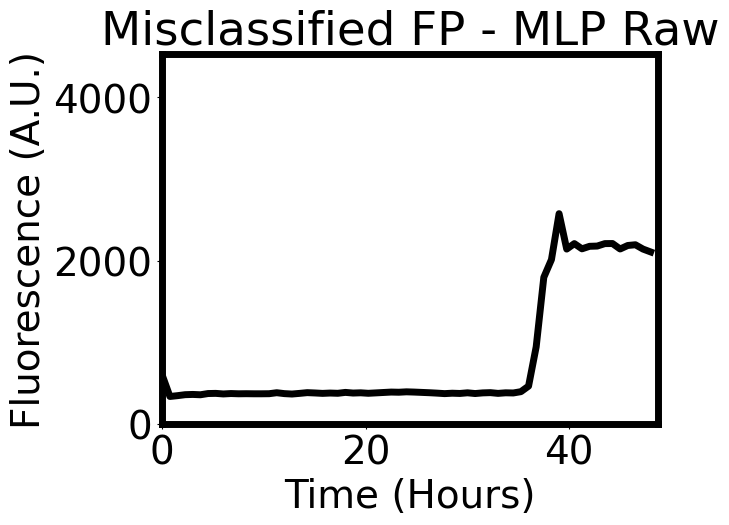

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.097911200807264, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.049054801466195765, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.743839485905147, Max: 54.23108384
MS:
	Min: 61.5, Average: 856.7055163084763, Max: 4282.833333
26/26 [==============================] - 0s 6ms/step


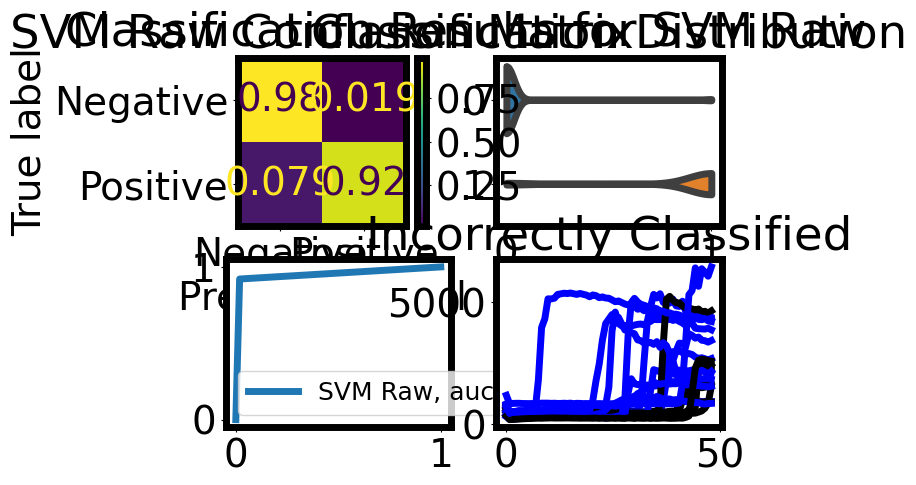

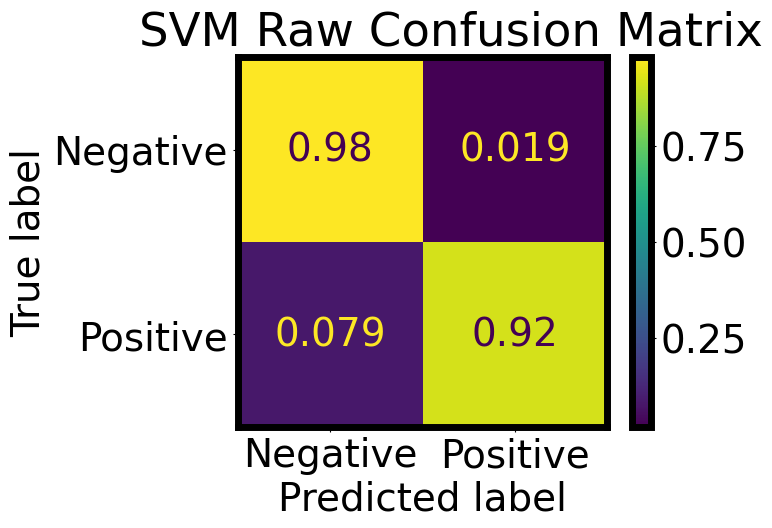

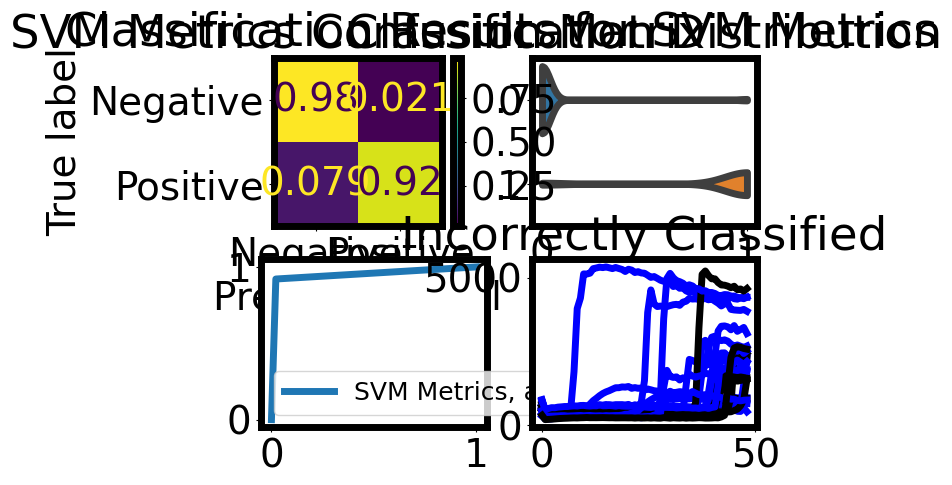

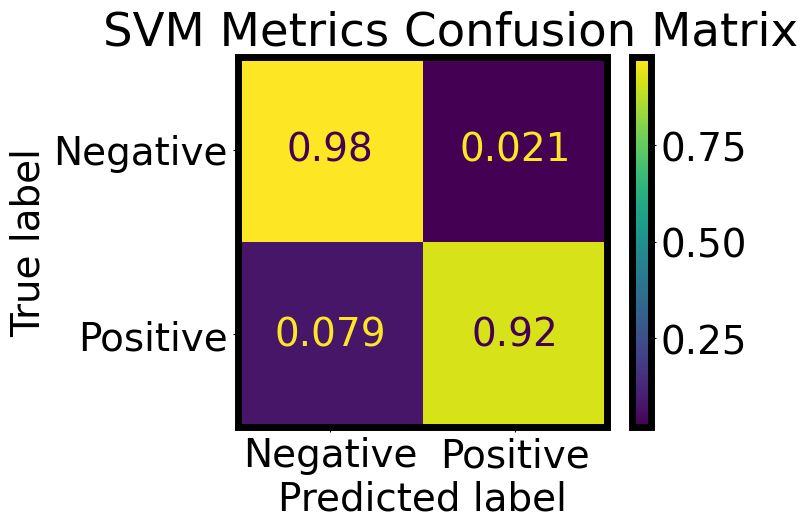

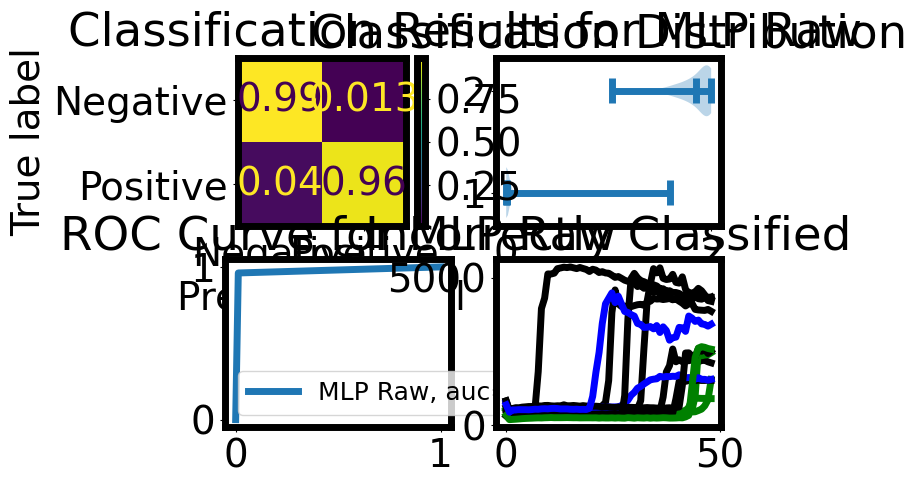

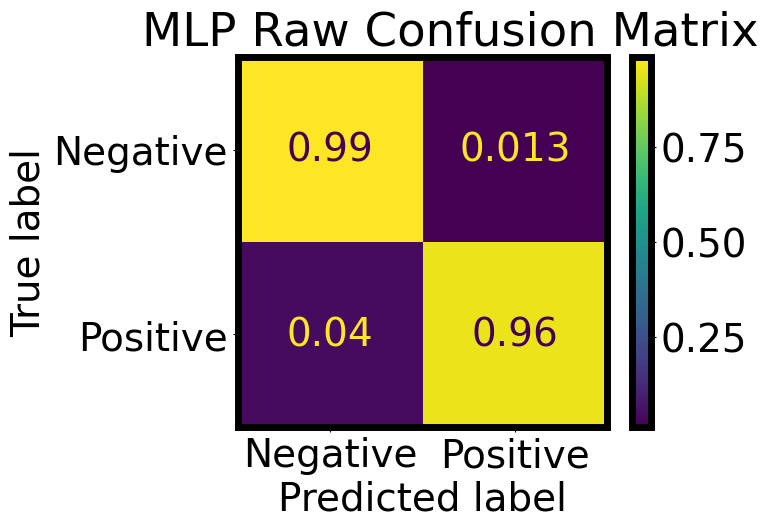

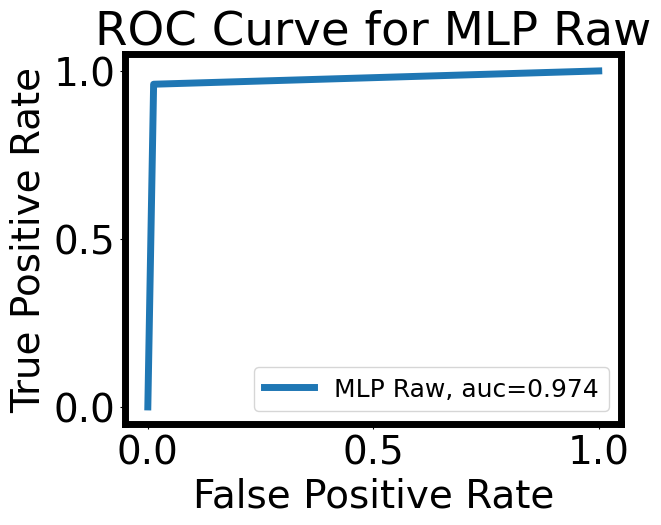

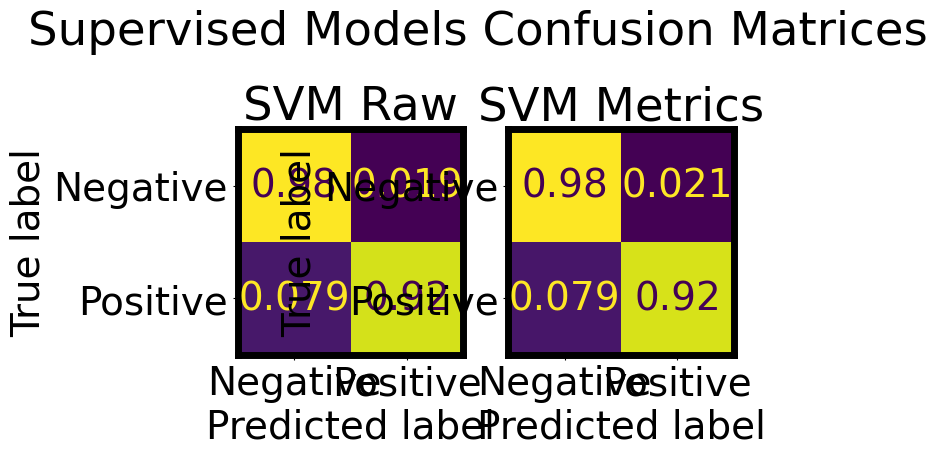

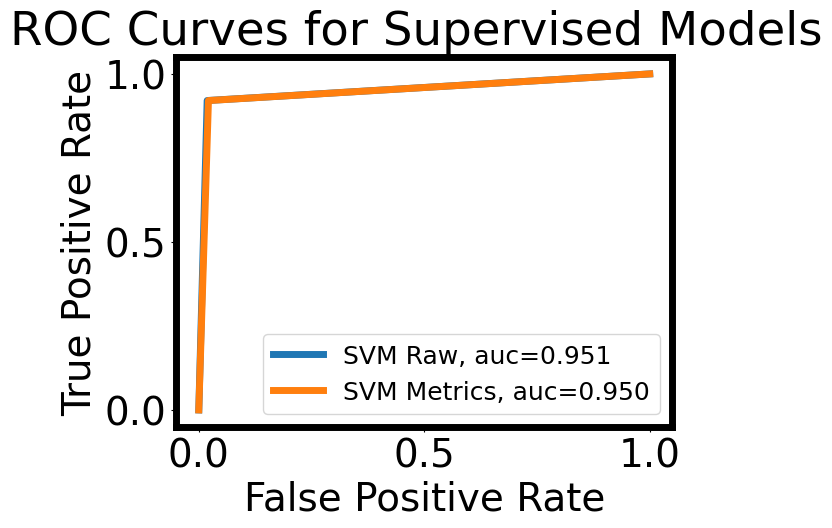

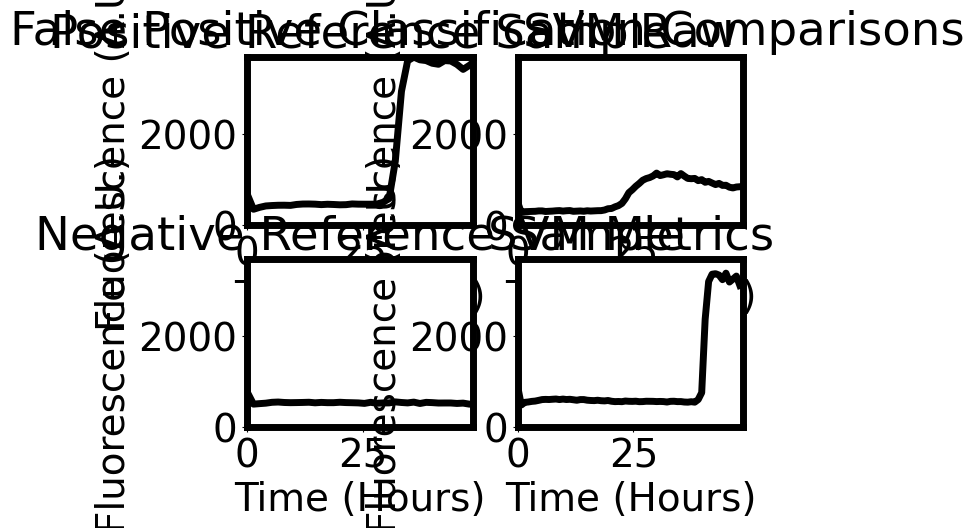

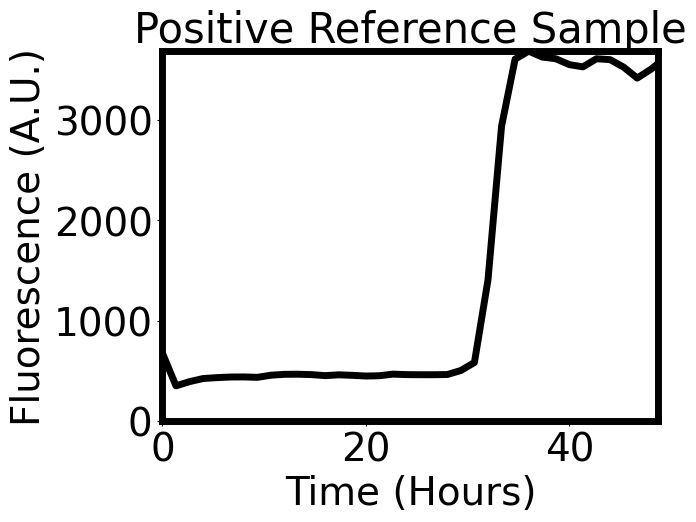

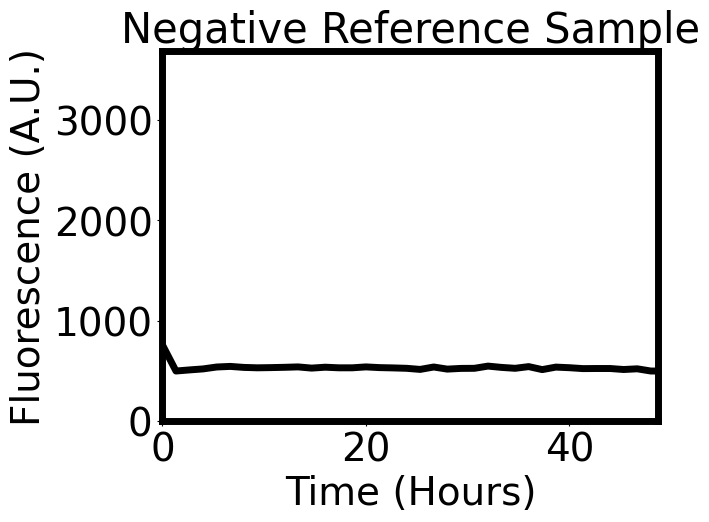

In [9]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])
ml_quic.get_group_plots_supervised(tags = ['Supervised'])

In [10]:
data = ml_quic.get_numpy_dataset('raw')
labels = ml_quic.get_numpy_dataset('labels')
preds = ml_quic.models['MLP Raw'].predict(data, labels)

pred_1d = np.rint(preds)
indices = np.where(pred_1d != labels)

samples = ml_quic.metadata.iloc[indices]

msa_count = 0
pd_count = 0
c_count = 0
for condition in samples['condition']:
    if condition == 'MSA': msa_count += 1
    elif condition == 'PD': pd_count += 1
    else: c_count += 1
    
print('MSA: {}\nPD: {}\nControl: {}'.format(msa_count, pd_count, c_count))

251/251 [==============================] - 1s 3ms/step


KeyError: 'condition'

### G-Well Evaluation

In [ ]:
#%%
### Test on G Wells
ml_quic = ml_quic = QuICSeedIF.QuICSeedIF()
ml_quic.import_dataset(data_dir='./Data/GrinderGWells')
ml_quic.get_dataset_statistics()

ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Analysis/', model_name='svm'
    ), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')

ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

ml_quic.separate_train_test(tags=['Supervised', 'Unsupervised'], train_type=3, file_loc='./TrainTest/GWells')

### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised', 'Unsupervised'])

pred_km, sample_list_km = ml_quic.evaluate_replicate_performance(model='KMeans Metrics')
pred_svm_r, sample_list_svmr = ml_quic.evaluate_replicate_performance(model='SVM Raw')
pred_svm_m, sample_list_svmm = ml_quic.evaluate_replicate_performance(model='SVM Metrics')
pred_mlp, sample_list_mlp = ml_quic.evaluate_replicate_performance(model='MLP Raw')

print('Model Sample Predictions:')
print('\n{:20s} {:20s} {:20s} {:20s} {:20s}'.format('Sample:', 'KMeans Metrics:', 'SVM Raw:', 'SVM Metrics:', 'MLP Raw:'))
for i in range(len(pred_km)):
    if sample_list_km[i] != sample_list_mlp[i] or sample_list_mlp[i] != sample_list_svmm[i] or sample_list_svmm[i] != sample_list_svmr[i]:
        raise Exception('Sample order does not agree!')
    print('{:20s} {:20s} {:20s} {:20s} {:20s}'.format(sample_list_km[i], pred_km[i], pred_svm_r[i], pred_svm_m[i], pred_mlp[i]))

pred_human = np.loadtxt('./Data/GrinderClean/Human_Annotation.csv', delimiter=',', dtype=str)
pred_human[0, 0] = '4'
pred_human = pred_human.astype(int)

## Create bar chart for visual comparison
import matplotlib.pyplot as plt
models = ['K-Means', 'MLP', 'Human']
bar_loc = np.arange(len(models))
bar_width = 0.25

preds = np.hstack([pred_km, pred_mlp, pred_human])

fig, ax = plt.subplots(layout = 'constrained')
for i, sample in enumerate(models):
    bar = ax.barh(bar_loc + i * bar_width, preds[i], bar_width, label = models[i])
    ax.bar_label(bar, padding=3)
    
ax.set_xlabel('Replicates Classified as Positive Out of 8')
ax.set_xlim([0, 8])
ax.set_xticks(bar_loc + bar_width, sample_list_km)
ax.legend()
plt.show()

Loading Data from ./Data/GrinderGWells
---- Dataset Label Distribution ----
Negative Samples: 208
False Positive Samples: 0
Positive Samples: 96

---- Well Content Distribution: ----
Data Wells: 304
Control Wells: 0

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>
\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>
SVM Raw:
              precision    recall  f1-score   support

         neg       0.86      1.00      0.93       208
         pos       1.00      0.66      0.79        96

    accuracy                           0.89       304
   macro avg       0.93      0.83      0.86       304
weighted avg       0.91      0.89      0.88       304

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.91      1.00      0.95       208
         pos       1.00      0.78      0.88        96

    accuracy                        

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(tru

1/1 [==============================] - ETA: 0s

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(tru

1/1 [==============================] - 0s 11ms/step
Model Sample Predictions:

Sample:              KMeans Metrics:      SVM Raw:             SVM Metrics:         MLP Raw:            
49G                  4/8                  2/8                  3/8                  3/8                 
49Gx01               0/8                  0/8                  0/8                  0/8                 
14G                  1/8                  0/8                  1/8                  0/8                 
14Gx01               1/8                  0/8                  0/8                  0/8                 
92G                  0/8                  0/8                  0/8                  0/8                 
92Gx01               5/8                  4/8                  4/8                  4/8                 
98G                  0/8                  0/8                  0/8                  0/8                 
98Gx01               4/8                  2/8                  3/8               

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 2 has 2 dimension(s)

## Feature Threshold Analysis
### Selecting Most Important Time Steps

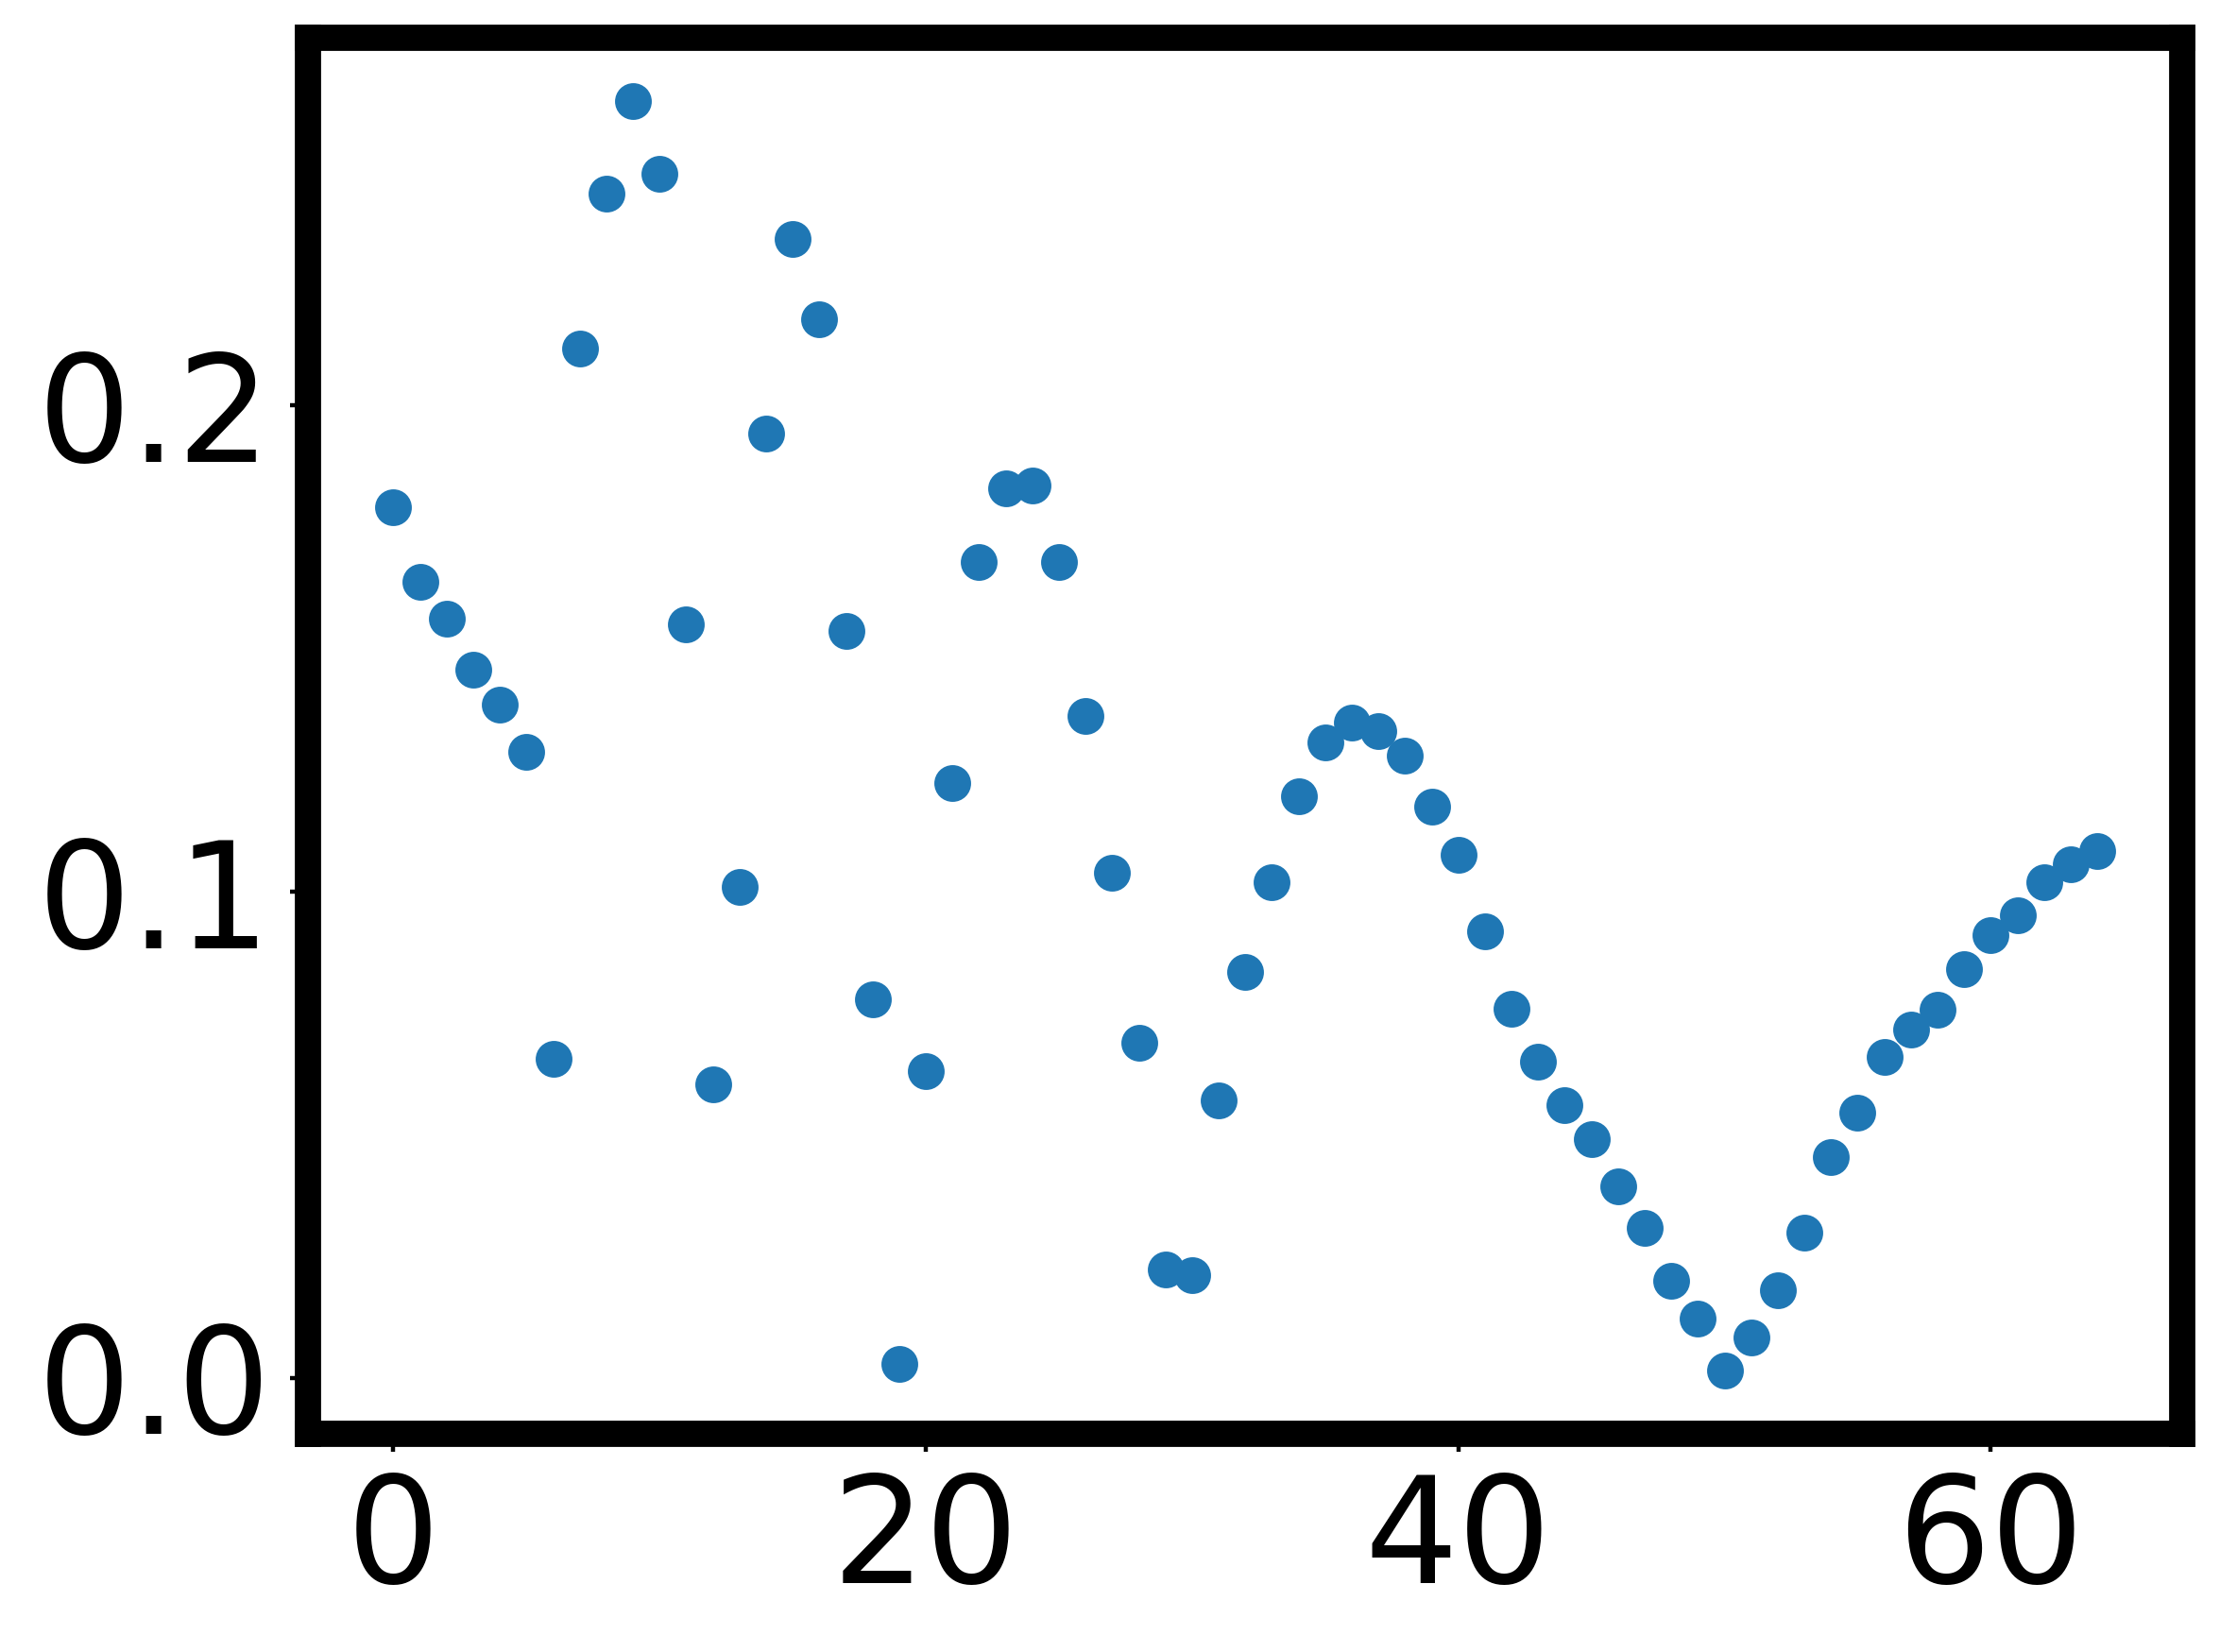

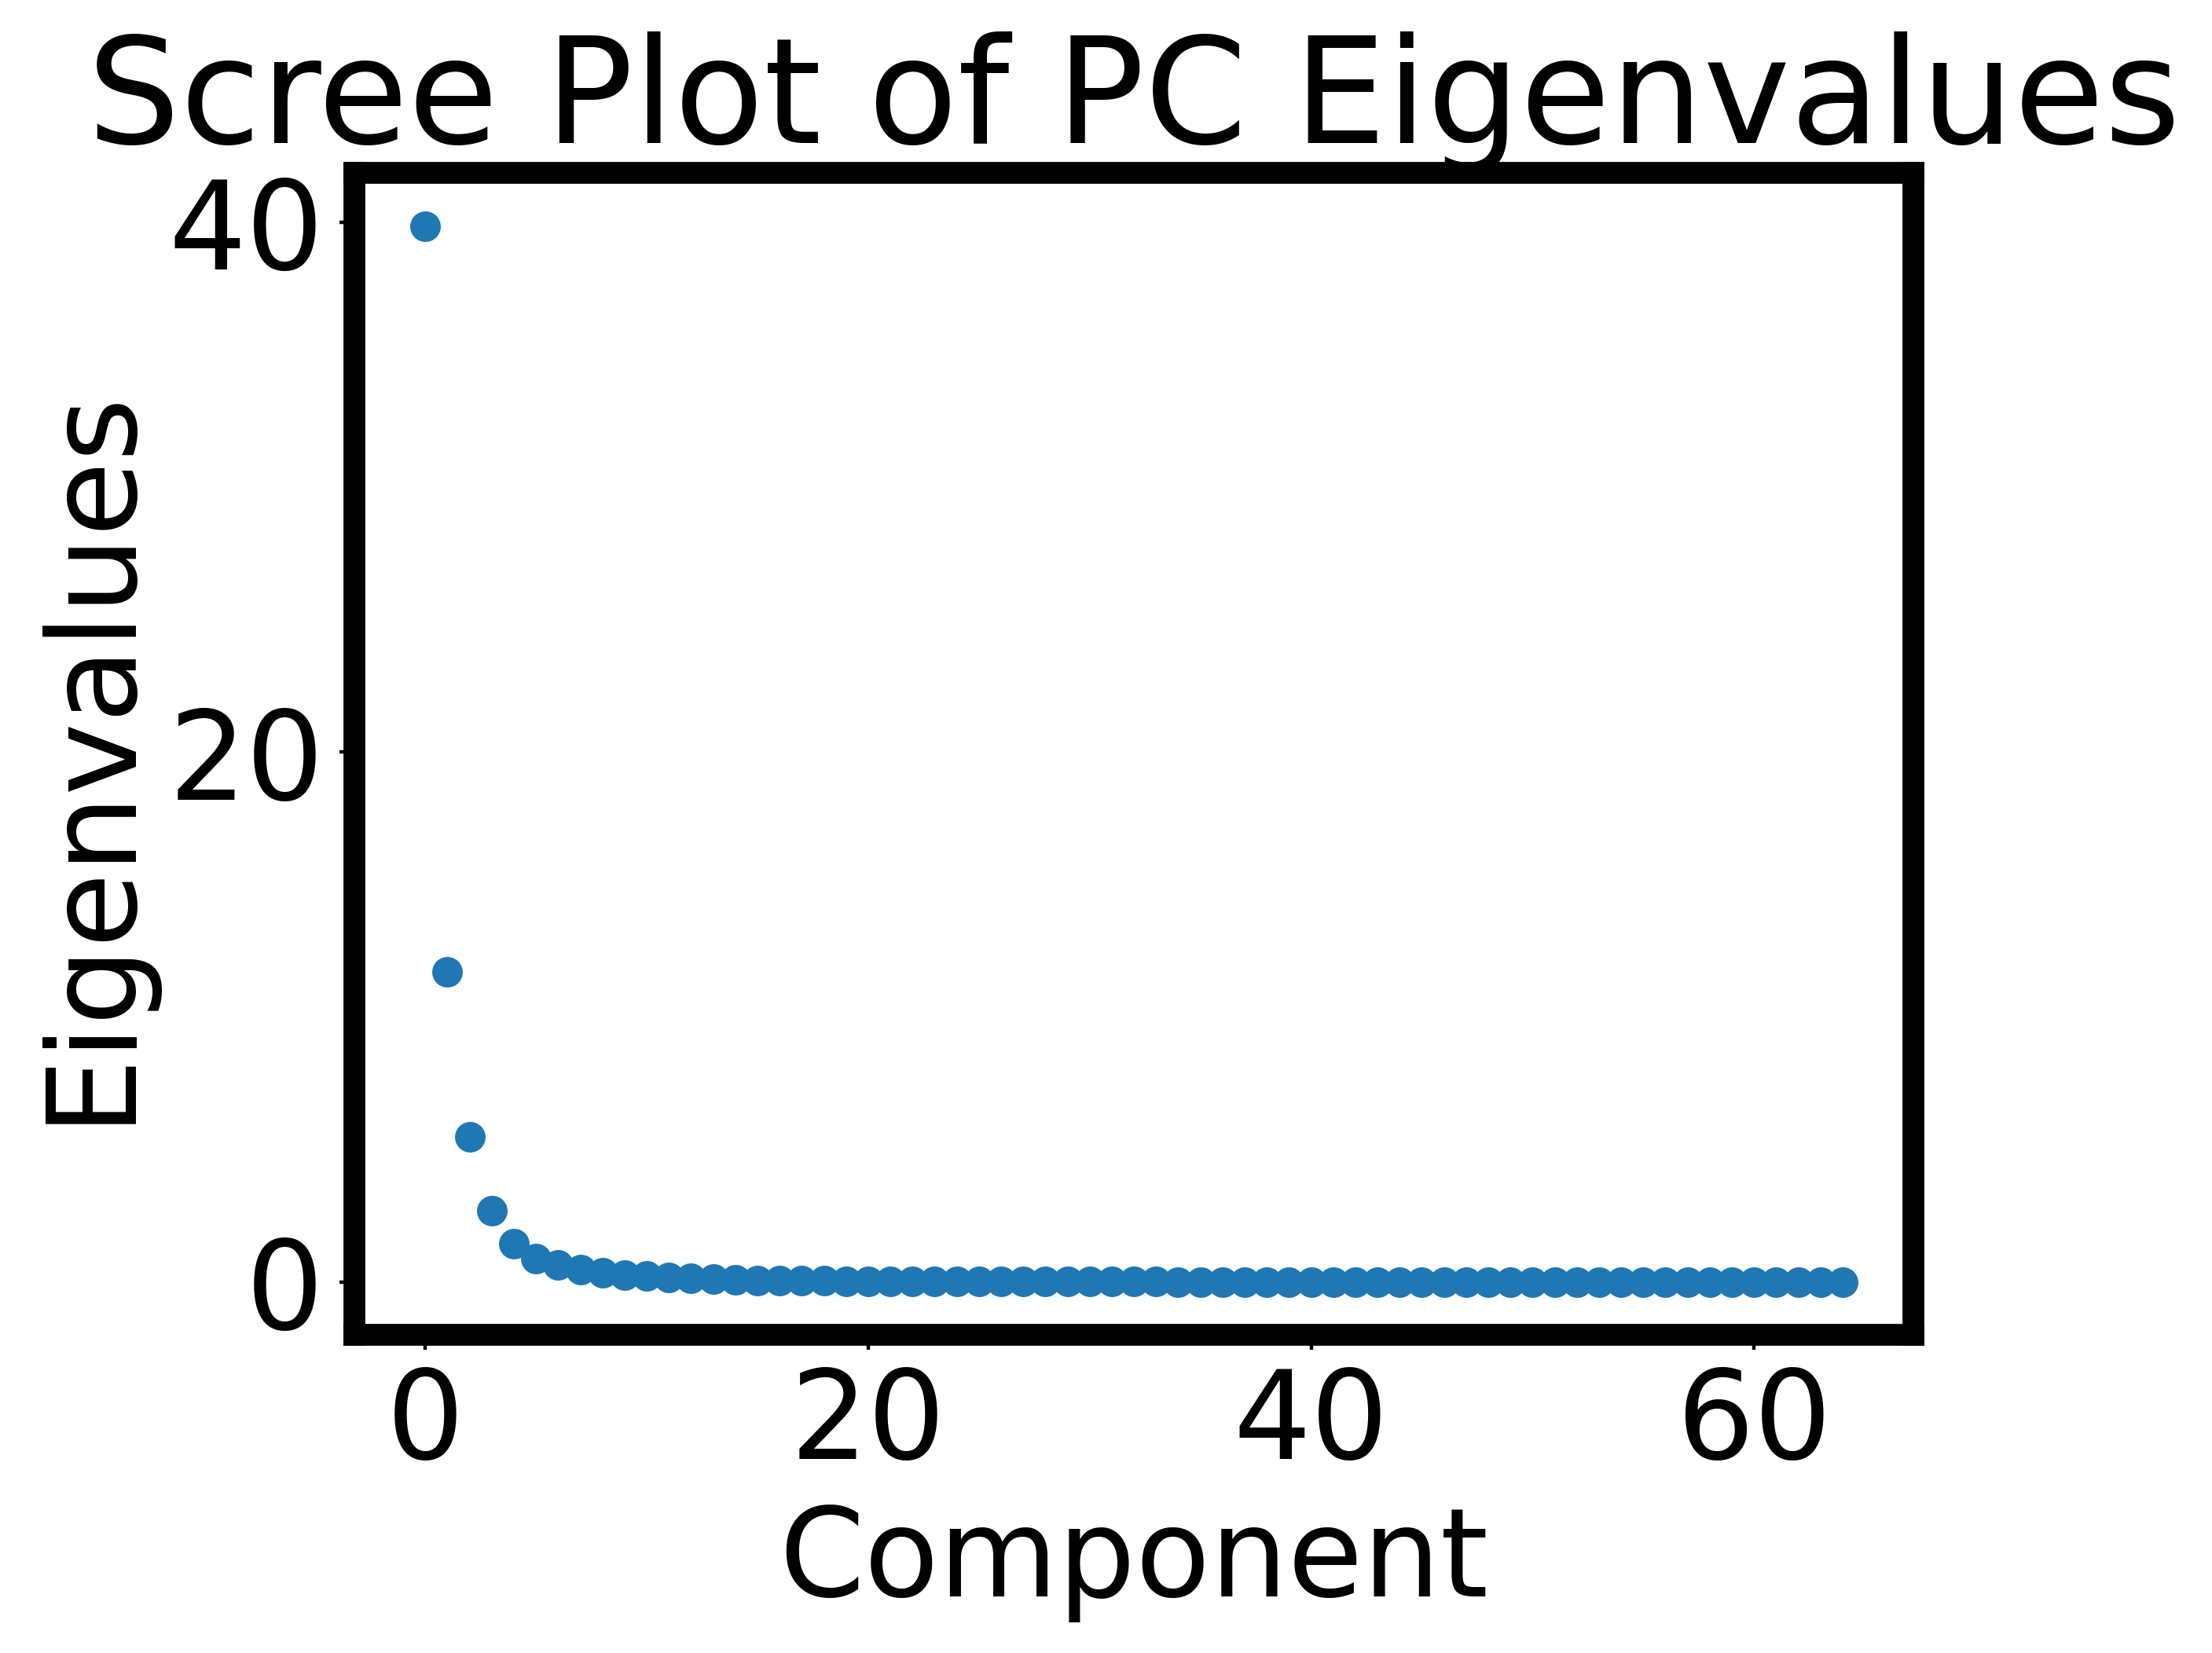

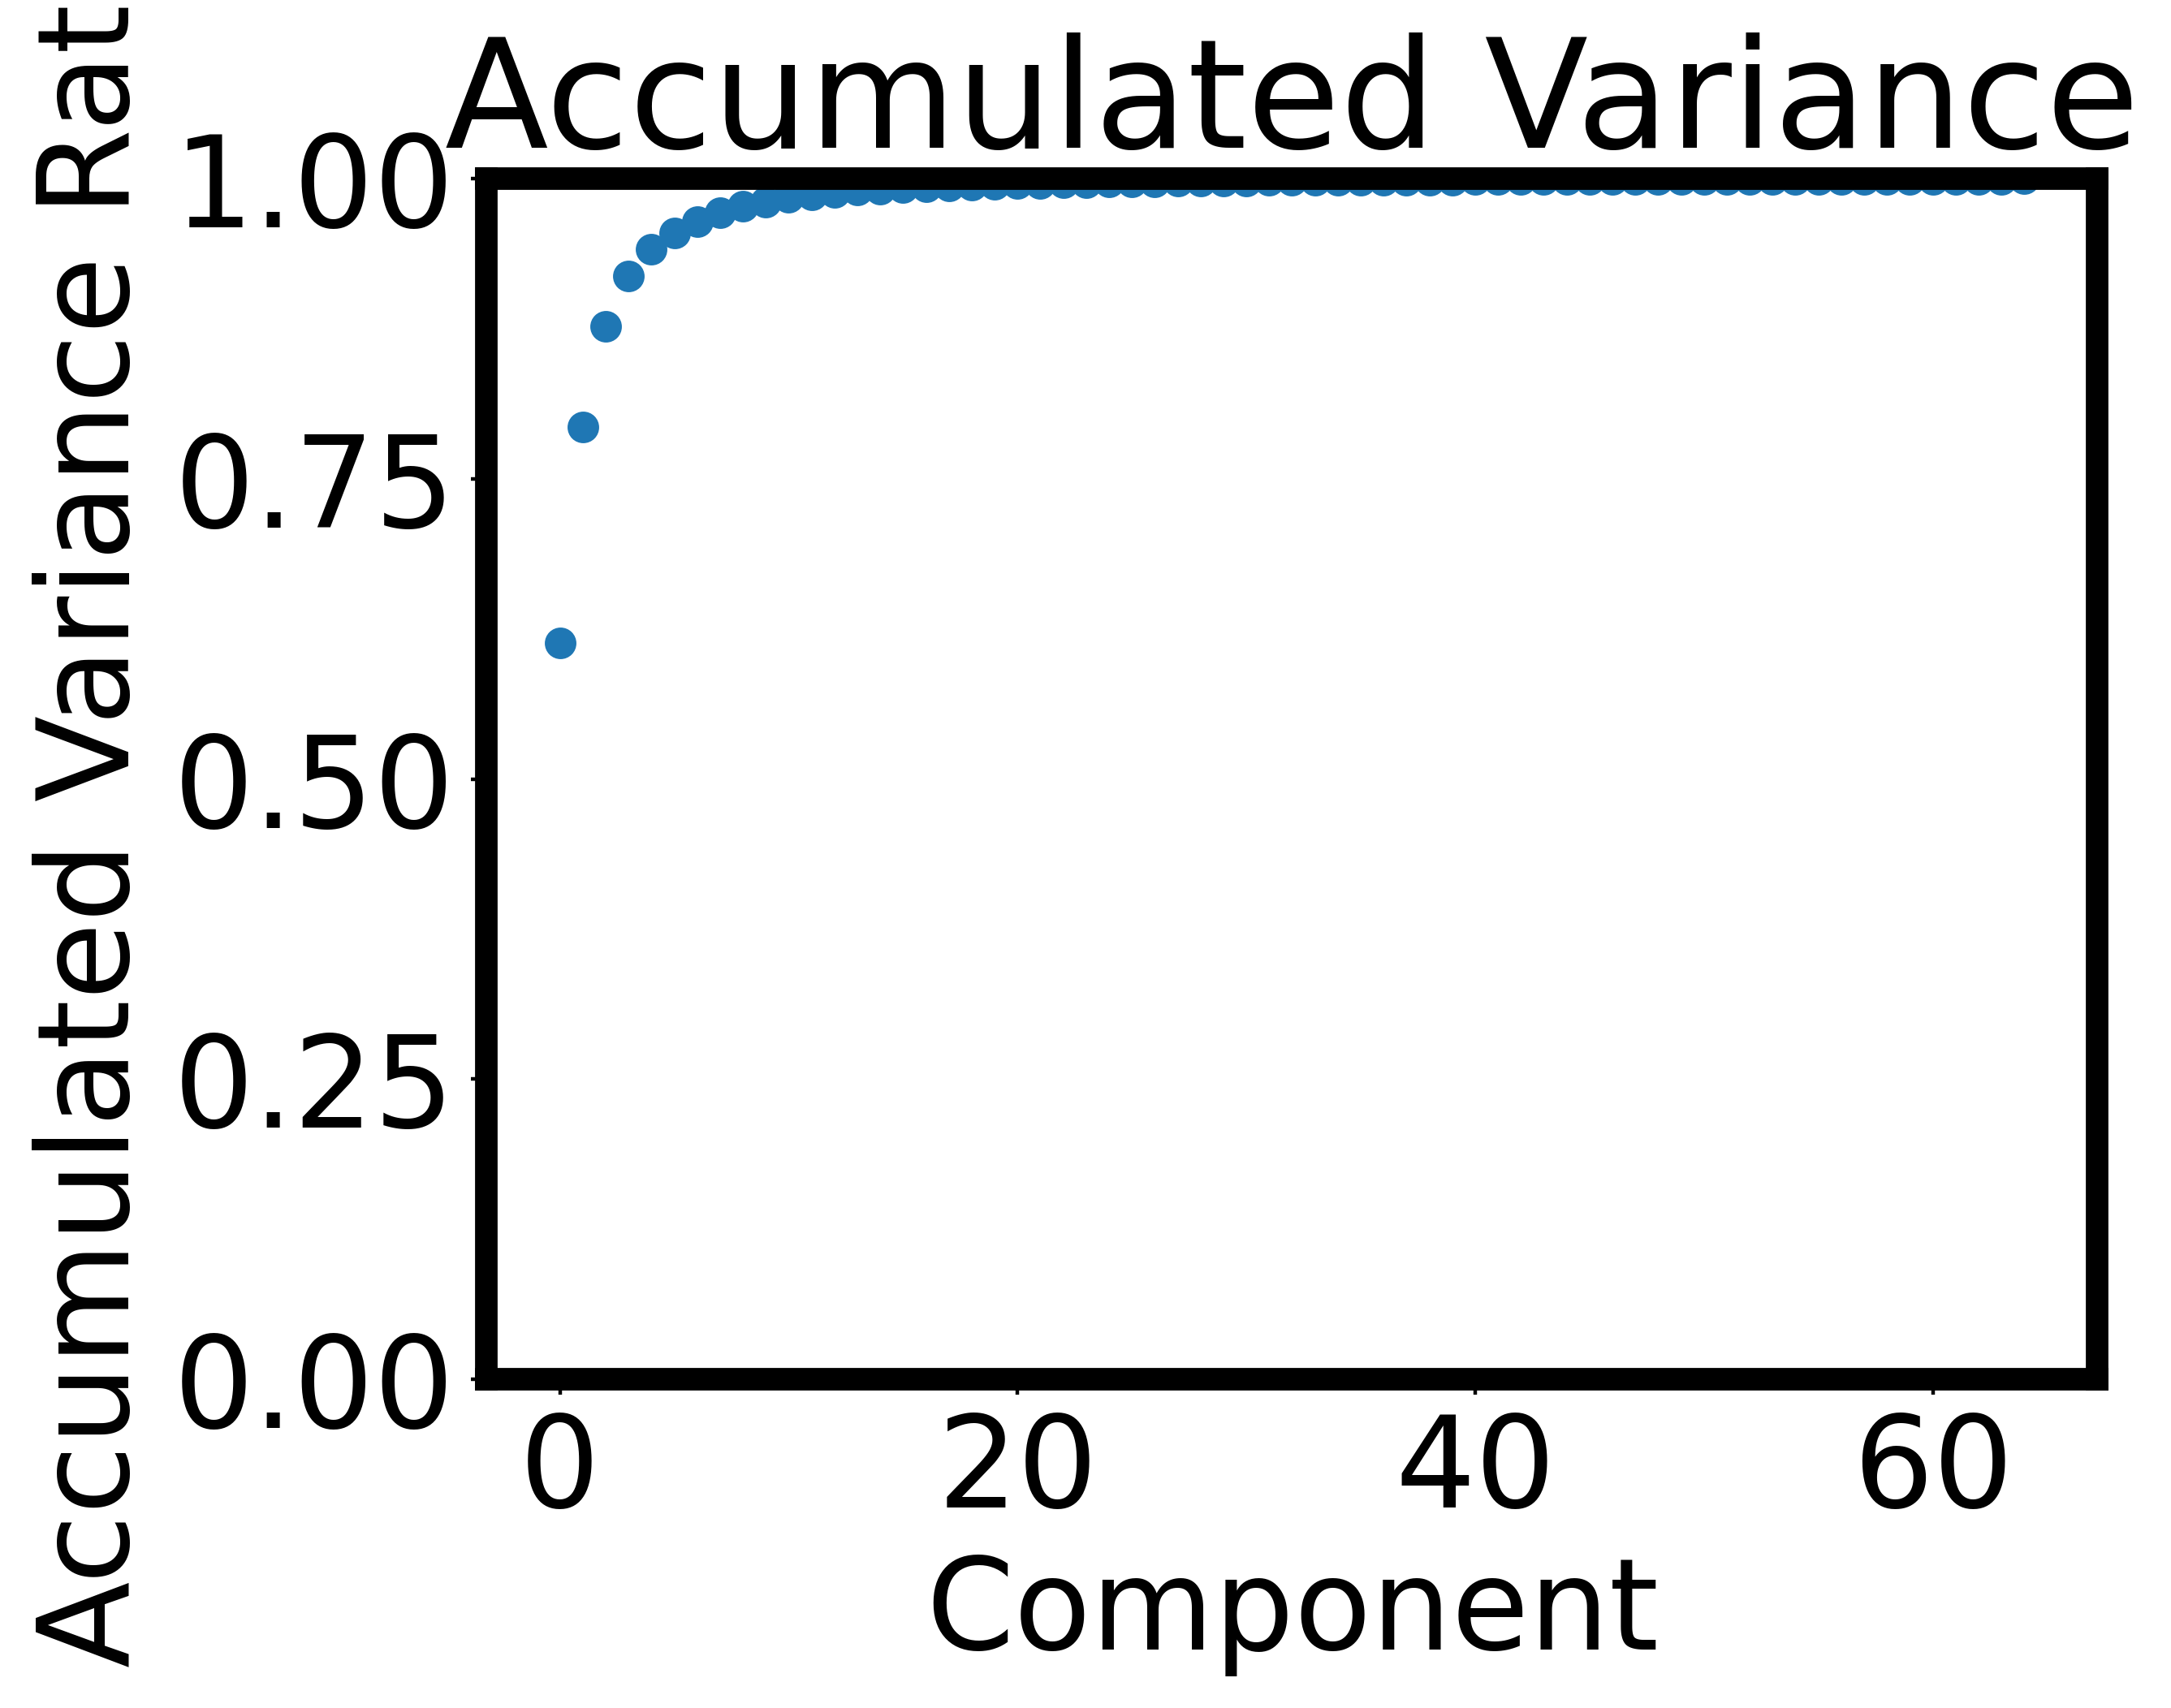

      content_replicate  labels       PC1       PC2
1                 43G_1       0 -2.860927 -2.642993
2              43Gx01_1       0 -2.307620 -1.278223
3                 44G_1       0 -2.778620 -2.344764
4              44Gx01_1       0 -2.303196 -1.091000
5                 45G_1       0 -3.335363 -3.185454
...                 ...     ...       ...       ...
8458  pos_8-20221115_M4       0 -0.529855  3.342936
8459          106Px01_4       0 -0.260150  3.685510
8460          106Px02_4       0 -0.410325  3.313809
8461          108Px01_4       0 -2.668236 -1.500086
8462          108Px02_4       0 -2.750716 -1.629319

[8011 rows x 4 columns]


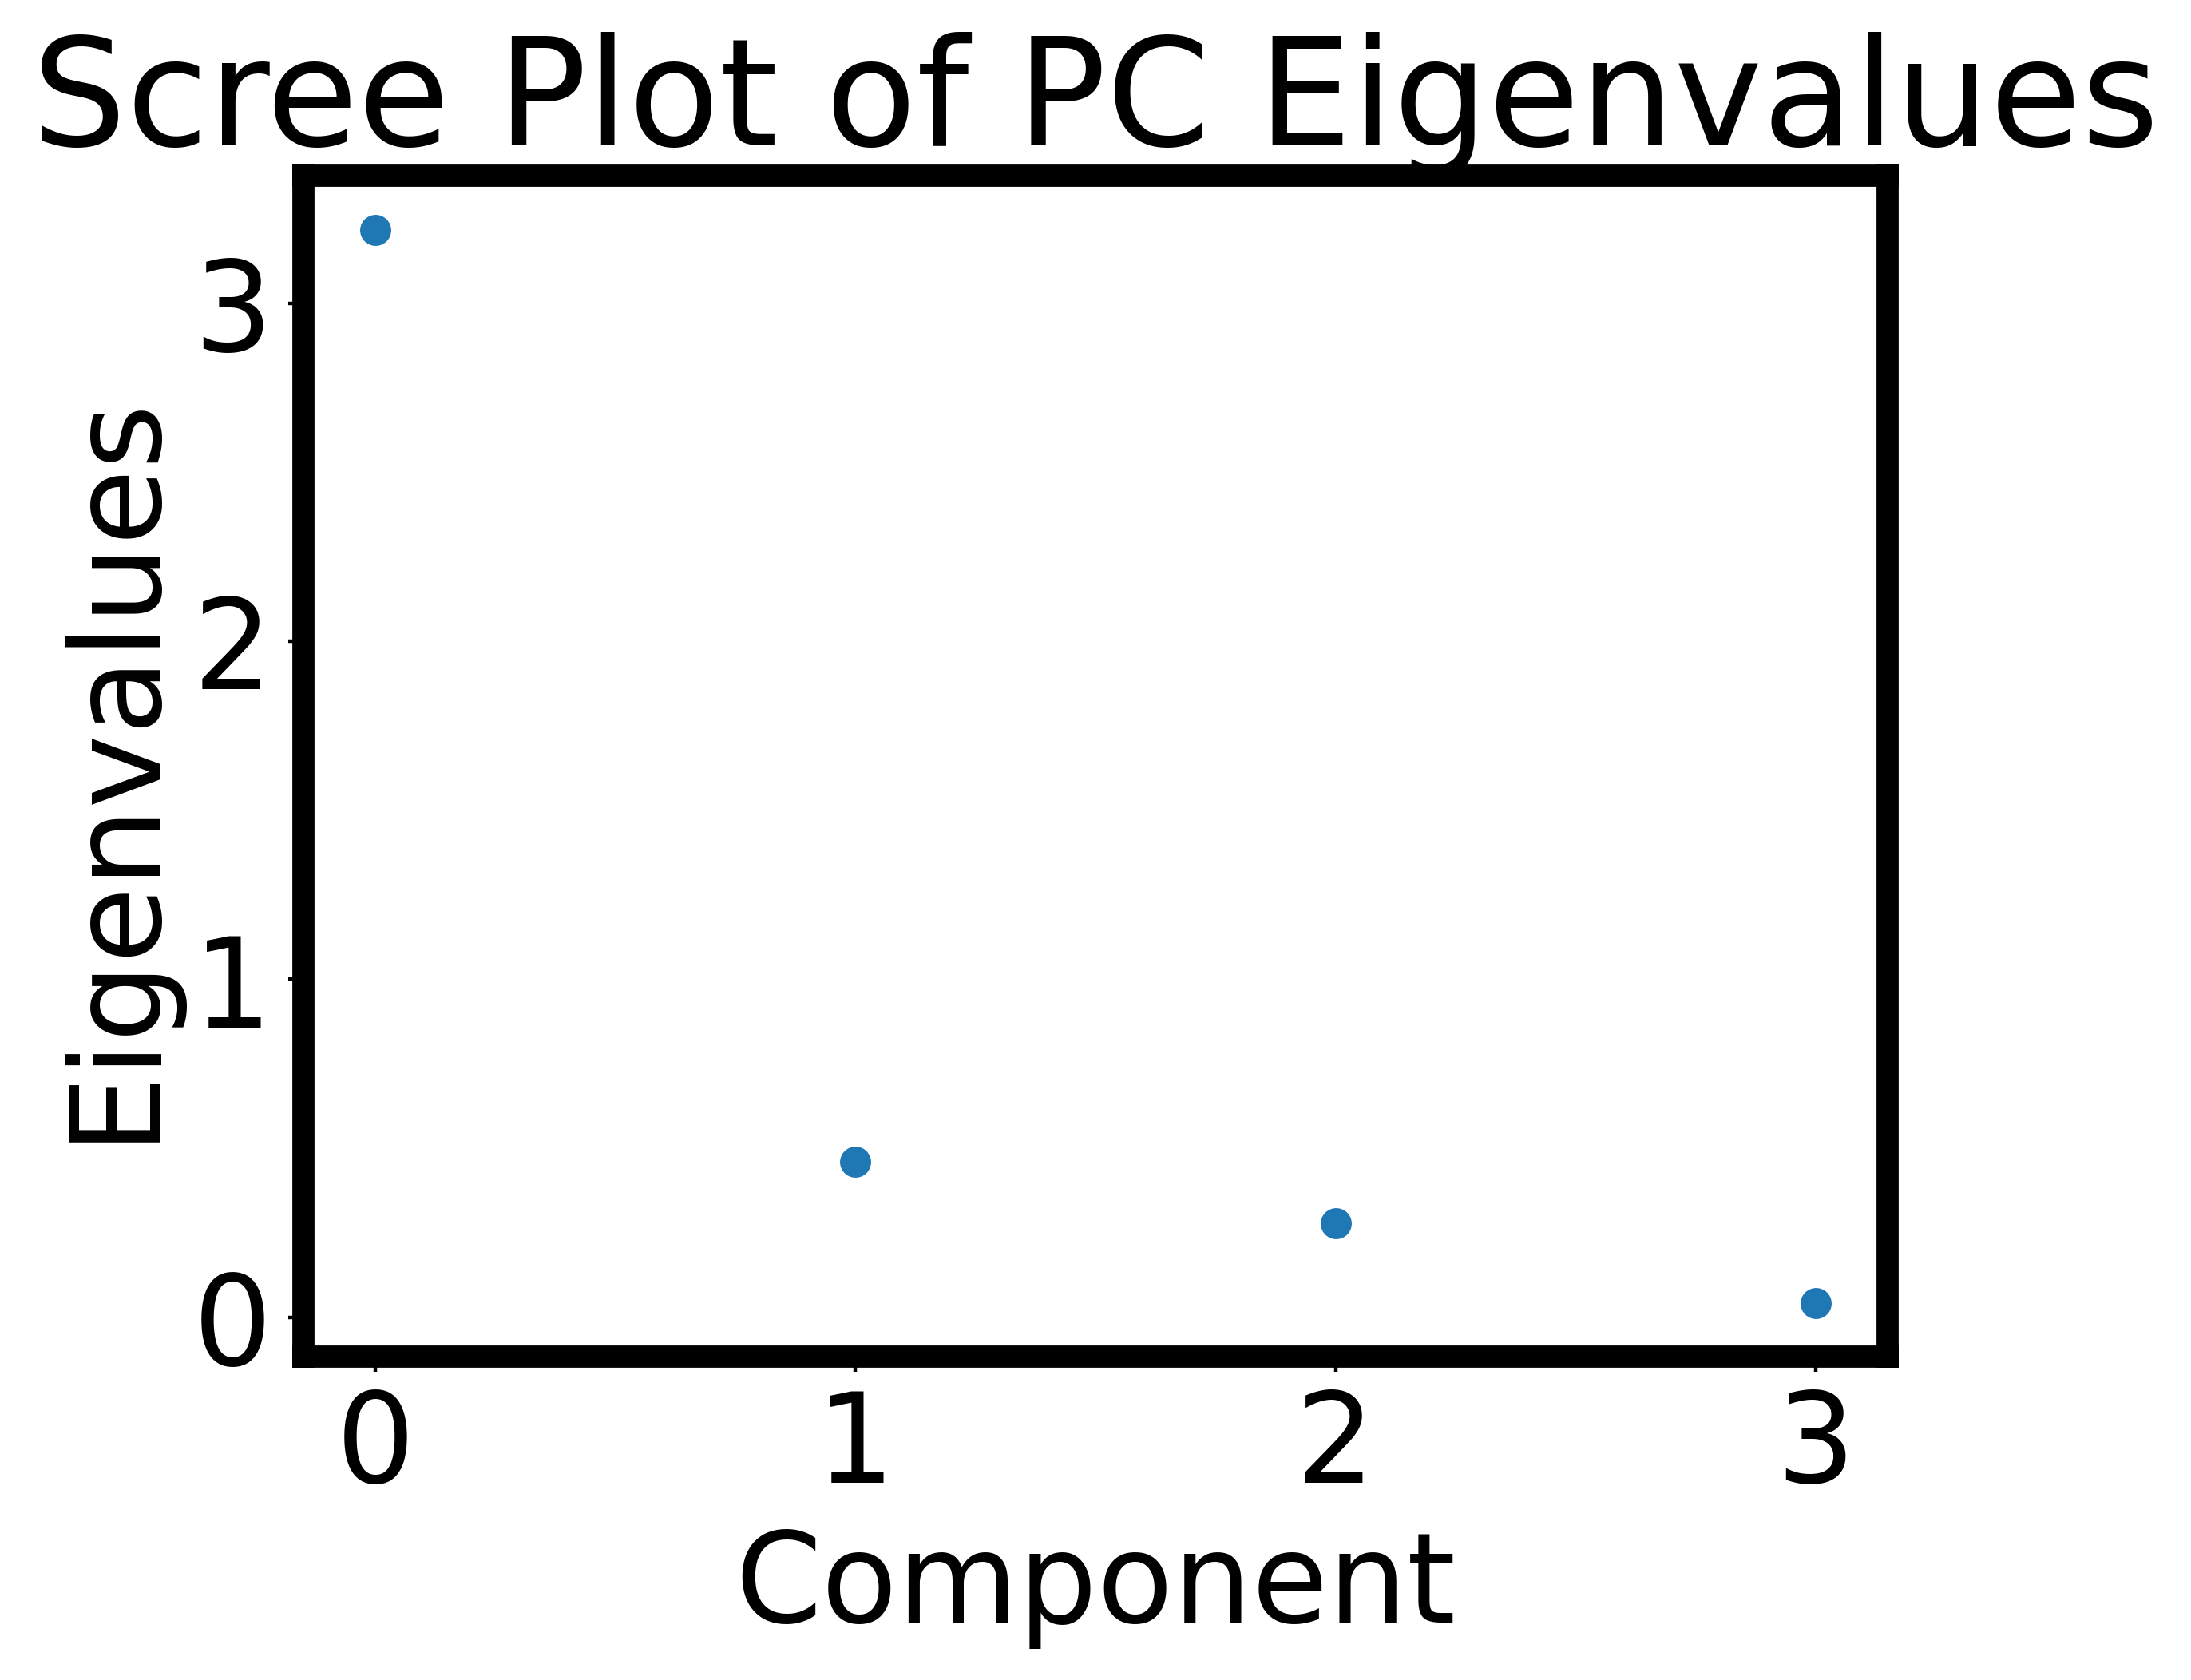

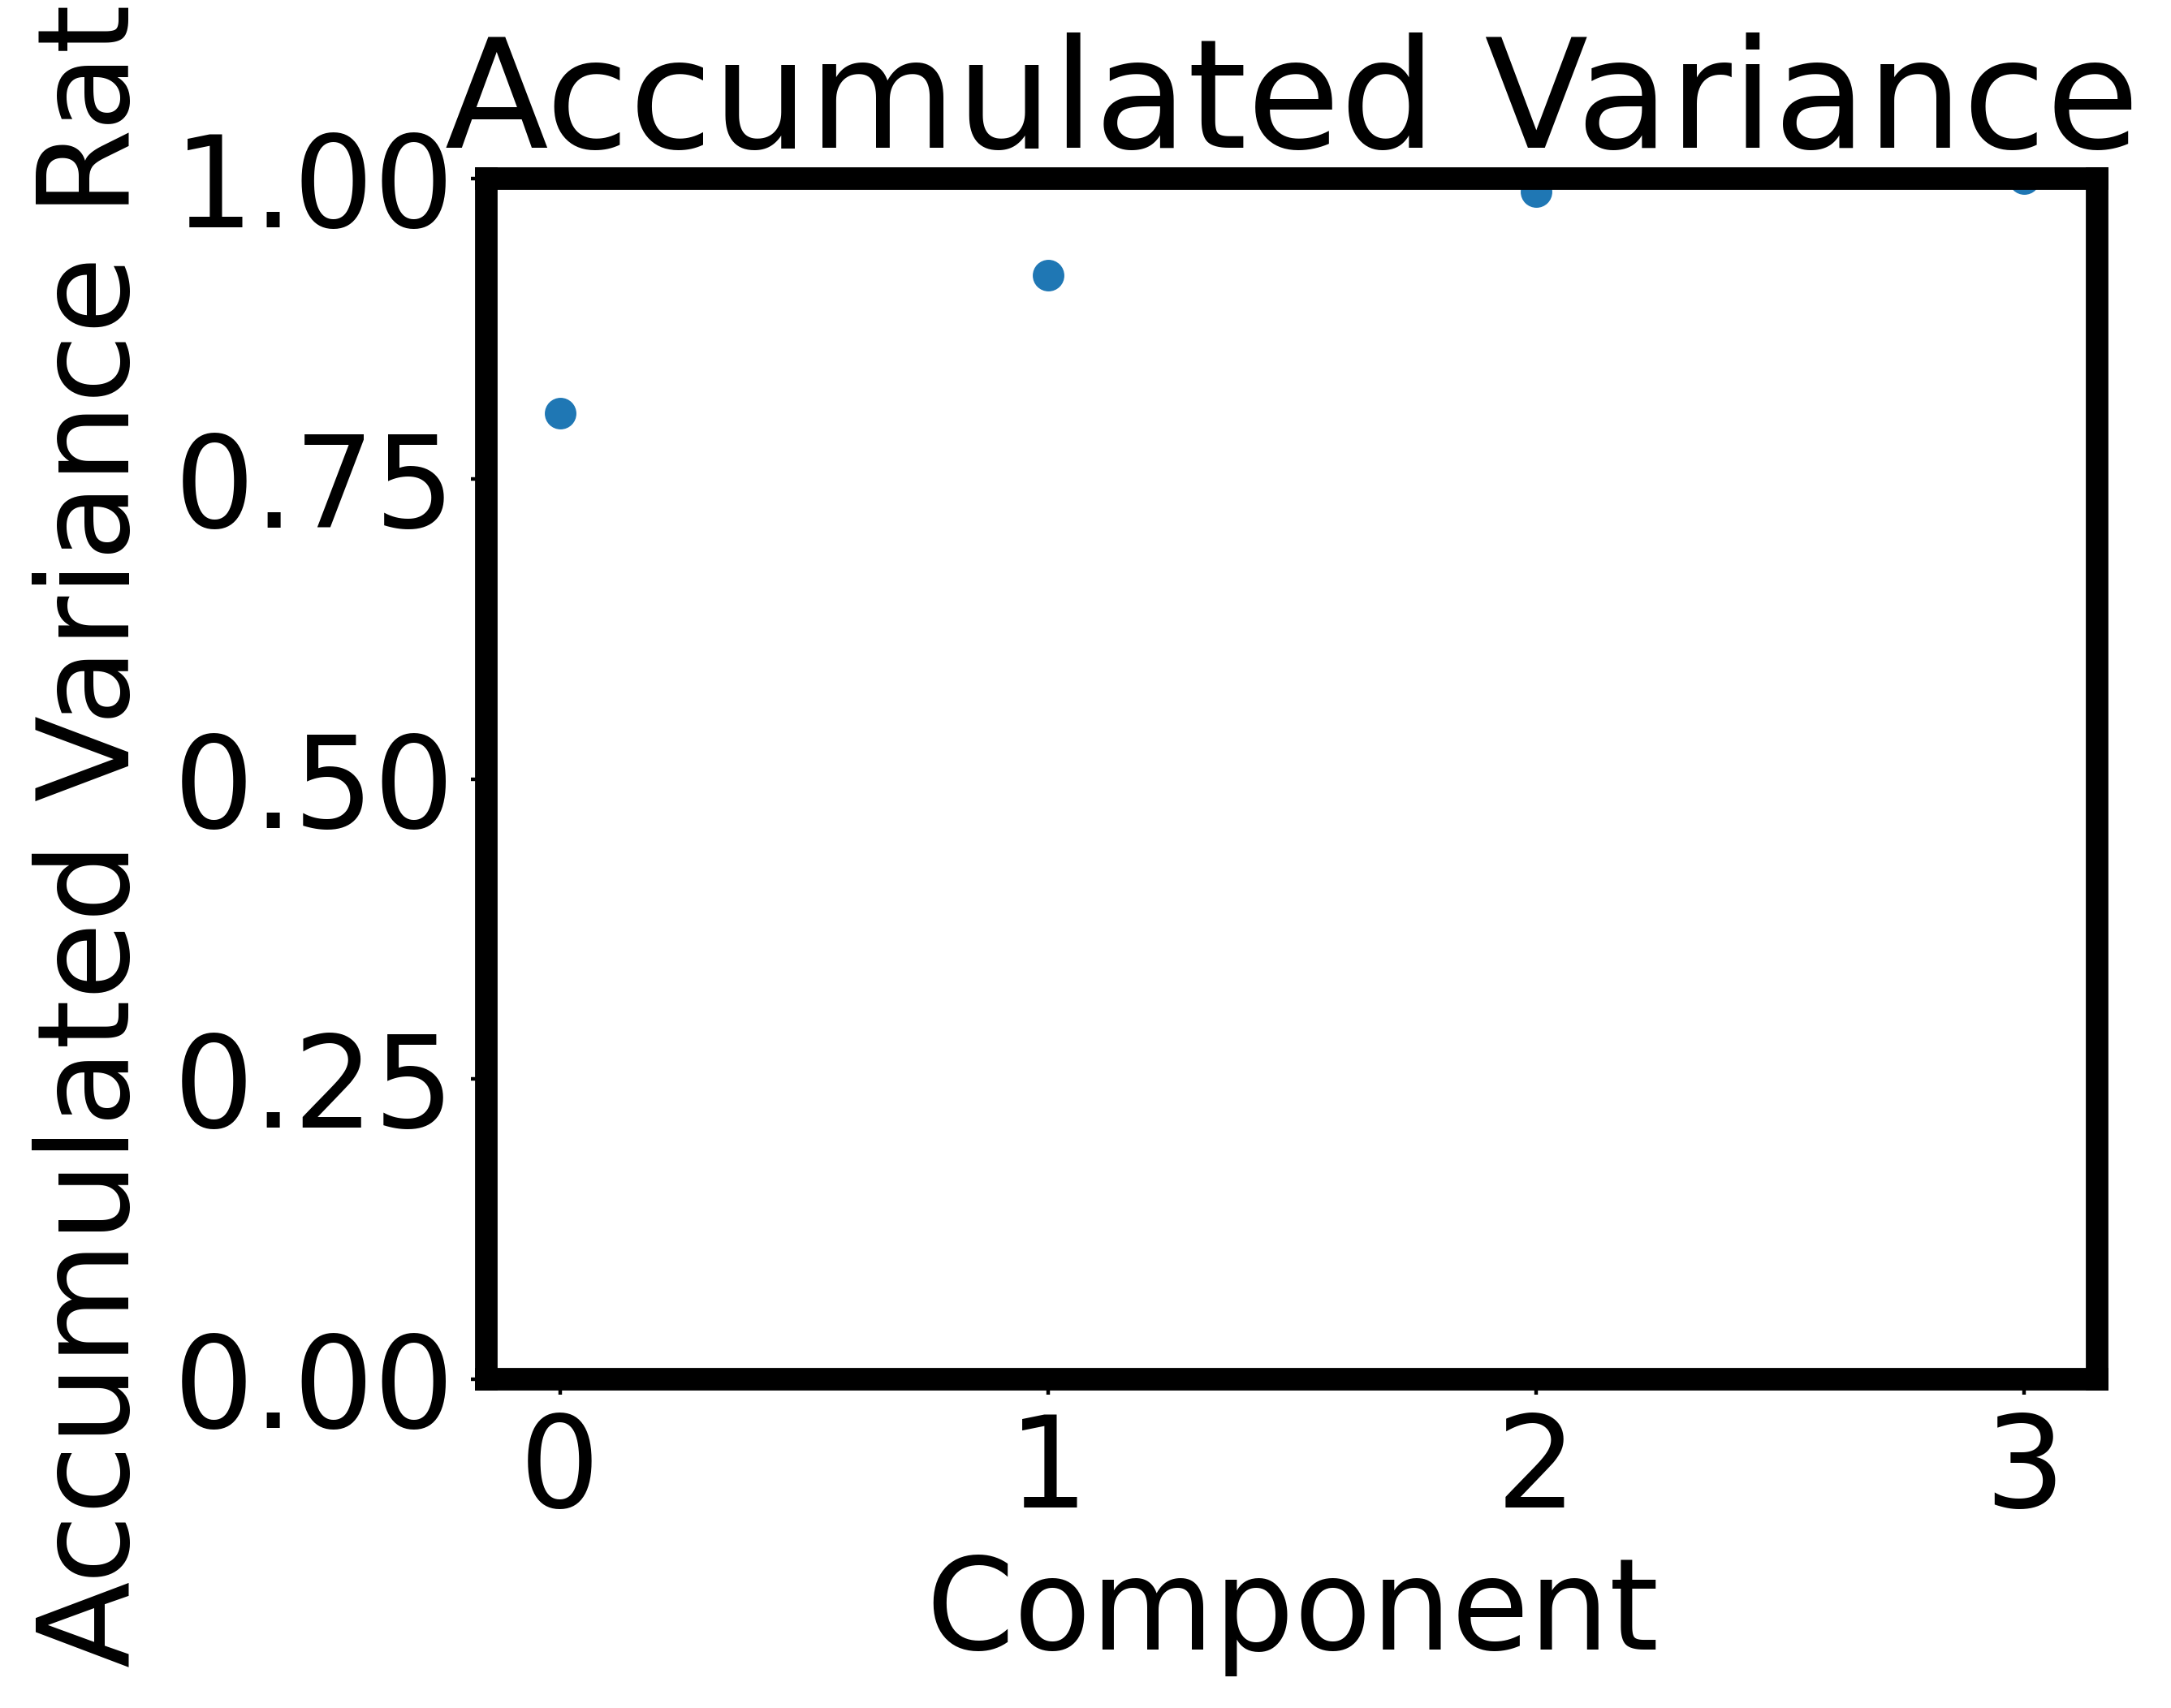

      content_replicate  labels       PC1       PC2
1                 43G_1       0 -0.709869  0.096355
2              43Gx01_1       0 -0.691635  0.107826
3                 44G_1       0 -0.686117  0.113896
4              44Gx01_1       0 -0.698025  0.102628
5                 45G_1       0 -0.703799  0.101383
...                 ...     ...       ...       ...
8458  pos_8-20221115_M4       0 -0.780186  0.044670
8459          106Px01_4       0 -0.770382  0.051190
8460          106Px02_4       0 -0.767813  0.052786
8461          108Px01_4       0 -0.744608  0.067789
8462          108Px02_4       0 -0.786847  0.040040

[8011 rows x 4 columns]


In [11]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle as pkl
import mpl_axes_aligner
import plotly.express as px
import pandas as pd

plt.rcParams['figure.dpi'] = 400

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
x_m = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('analysis'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
pca_m = PCA().fit(x_m)
skb = SelectKBest(k = 'all').fit(x, y)

pc_feature_scores = abs(pca.components_)
features = []
for i in range(len(pc_feature_scores[0])):
    features.append(np.sum(pc_feature_scores[5, i]))

plt.scatter(np.arange(len(features)), features)
plt.show()

## RAW DATA
# Scree Plot 
plt.scatter(np.arange(len(features)), pca.explained_variance_)
plt.title('Scree Plot of PC Eigenvalues')
plt.ylabel('Eigenvalues')
plt.xlabel('Component')
plt.show()

# Variance Ratio
sum = 0
accumulated_variance = []
for val in pca.explained_variance_ratio_:
    sum += val
    accumulated_variance.append(sum)

# Plot accumlation of variance
plt.scatter(np.arange(len(features)), np.array(accumulated_variance))
plt.title('Accumulated Variance')
plt.ylabel('Accumulated Variance Ratio')
plt.ylim([0, 1])
plt.xlabel('Component')
plt.show()

# Get Dataframe Version
df = ml_quic.raw_dataset

# Identify Samples
x_pca = pca.transform(x)

new_df = pd.DataFrame()
new_df['content_replicate'] = df['content_replicate']
df = new_df
df.insert(1, 'labels', y, True)

for i in range(1, 3):
    df.insert(i + 1, 'PC{}'.format(i), x_pca[:, i-1], True)
    
print(df)

fig = px.scatter(df, x='PC1', y='PC2', color = 'labels', hover_data=['content_replicate'])
fig.show()

## METRICS DATA
# Scree Plot 
plt.scatter(np.arange(len(pca_m.explained_variance_)), pca_m.explained_variance_)
plt.title('Scree Plot of PC Eigenvalues')
plt.ylabel('Eigenvalues')
plt.xlabel('Component')
plt.show()

# Variance Ratio
sum = 0
accumulated_variance = []
for val in pca_m.explained_variance_ratio_:
    sum += val
    accumulated_variance.append(sum)

# Plot accumlation of variance
plt.scatter(np.arange(len(pca_m.explained_variance_)), np.array(accumulated_variance))
plt.title('Accumulated Variance')
plt.ylabel('Accumulated Variance Ratio')
plt.ylim([0, 1])
plt.xlabel('Component')
plt.show()

# Create Biplot
# Get Dataframe Version
df = ml_quic.analysis_dataset

# Identify Samples
x_pca = pca_m.transform(x_m)

new_df = pd.DataFrame()
new_df['content_replicate'] = df['content_replicate']
df = new_df
df.insert(1, 'labels', y, True)

for i in range(1, 3):
    df.insert(i + 1, 'PC{}'.format(i), x_pca[:, i-1], True)
    
print(df)

fig = px.scatter(df, x='PC1', y='PC2', color = 'labels', hover_data=['content_replicate'])
fig.show()

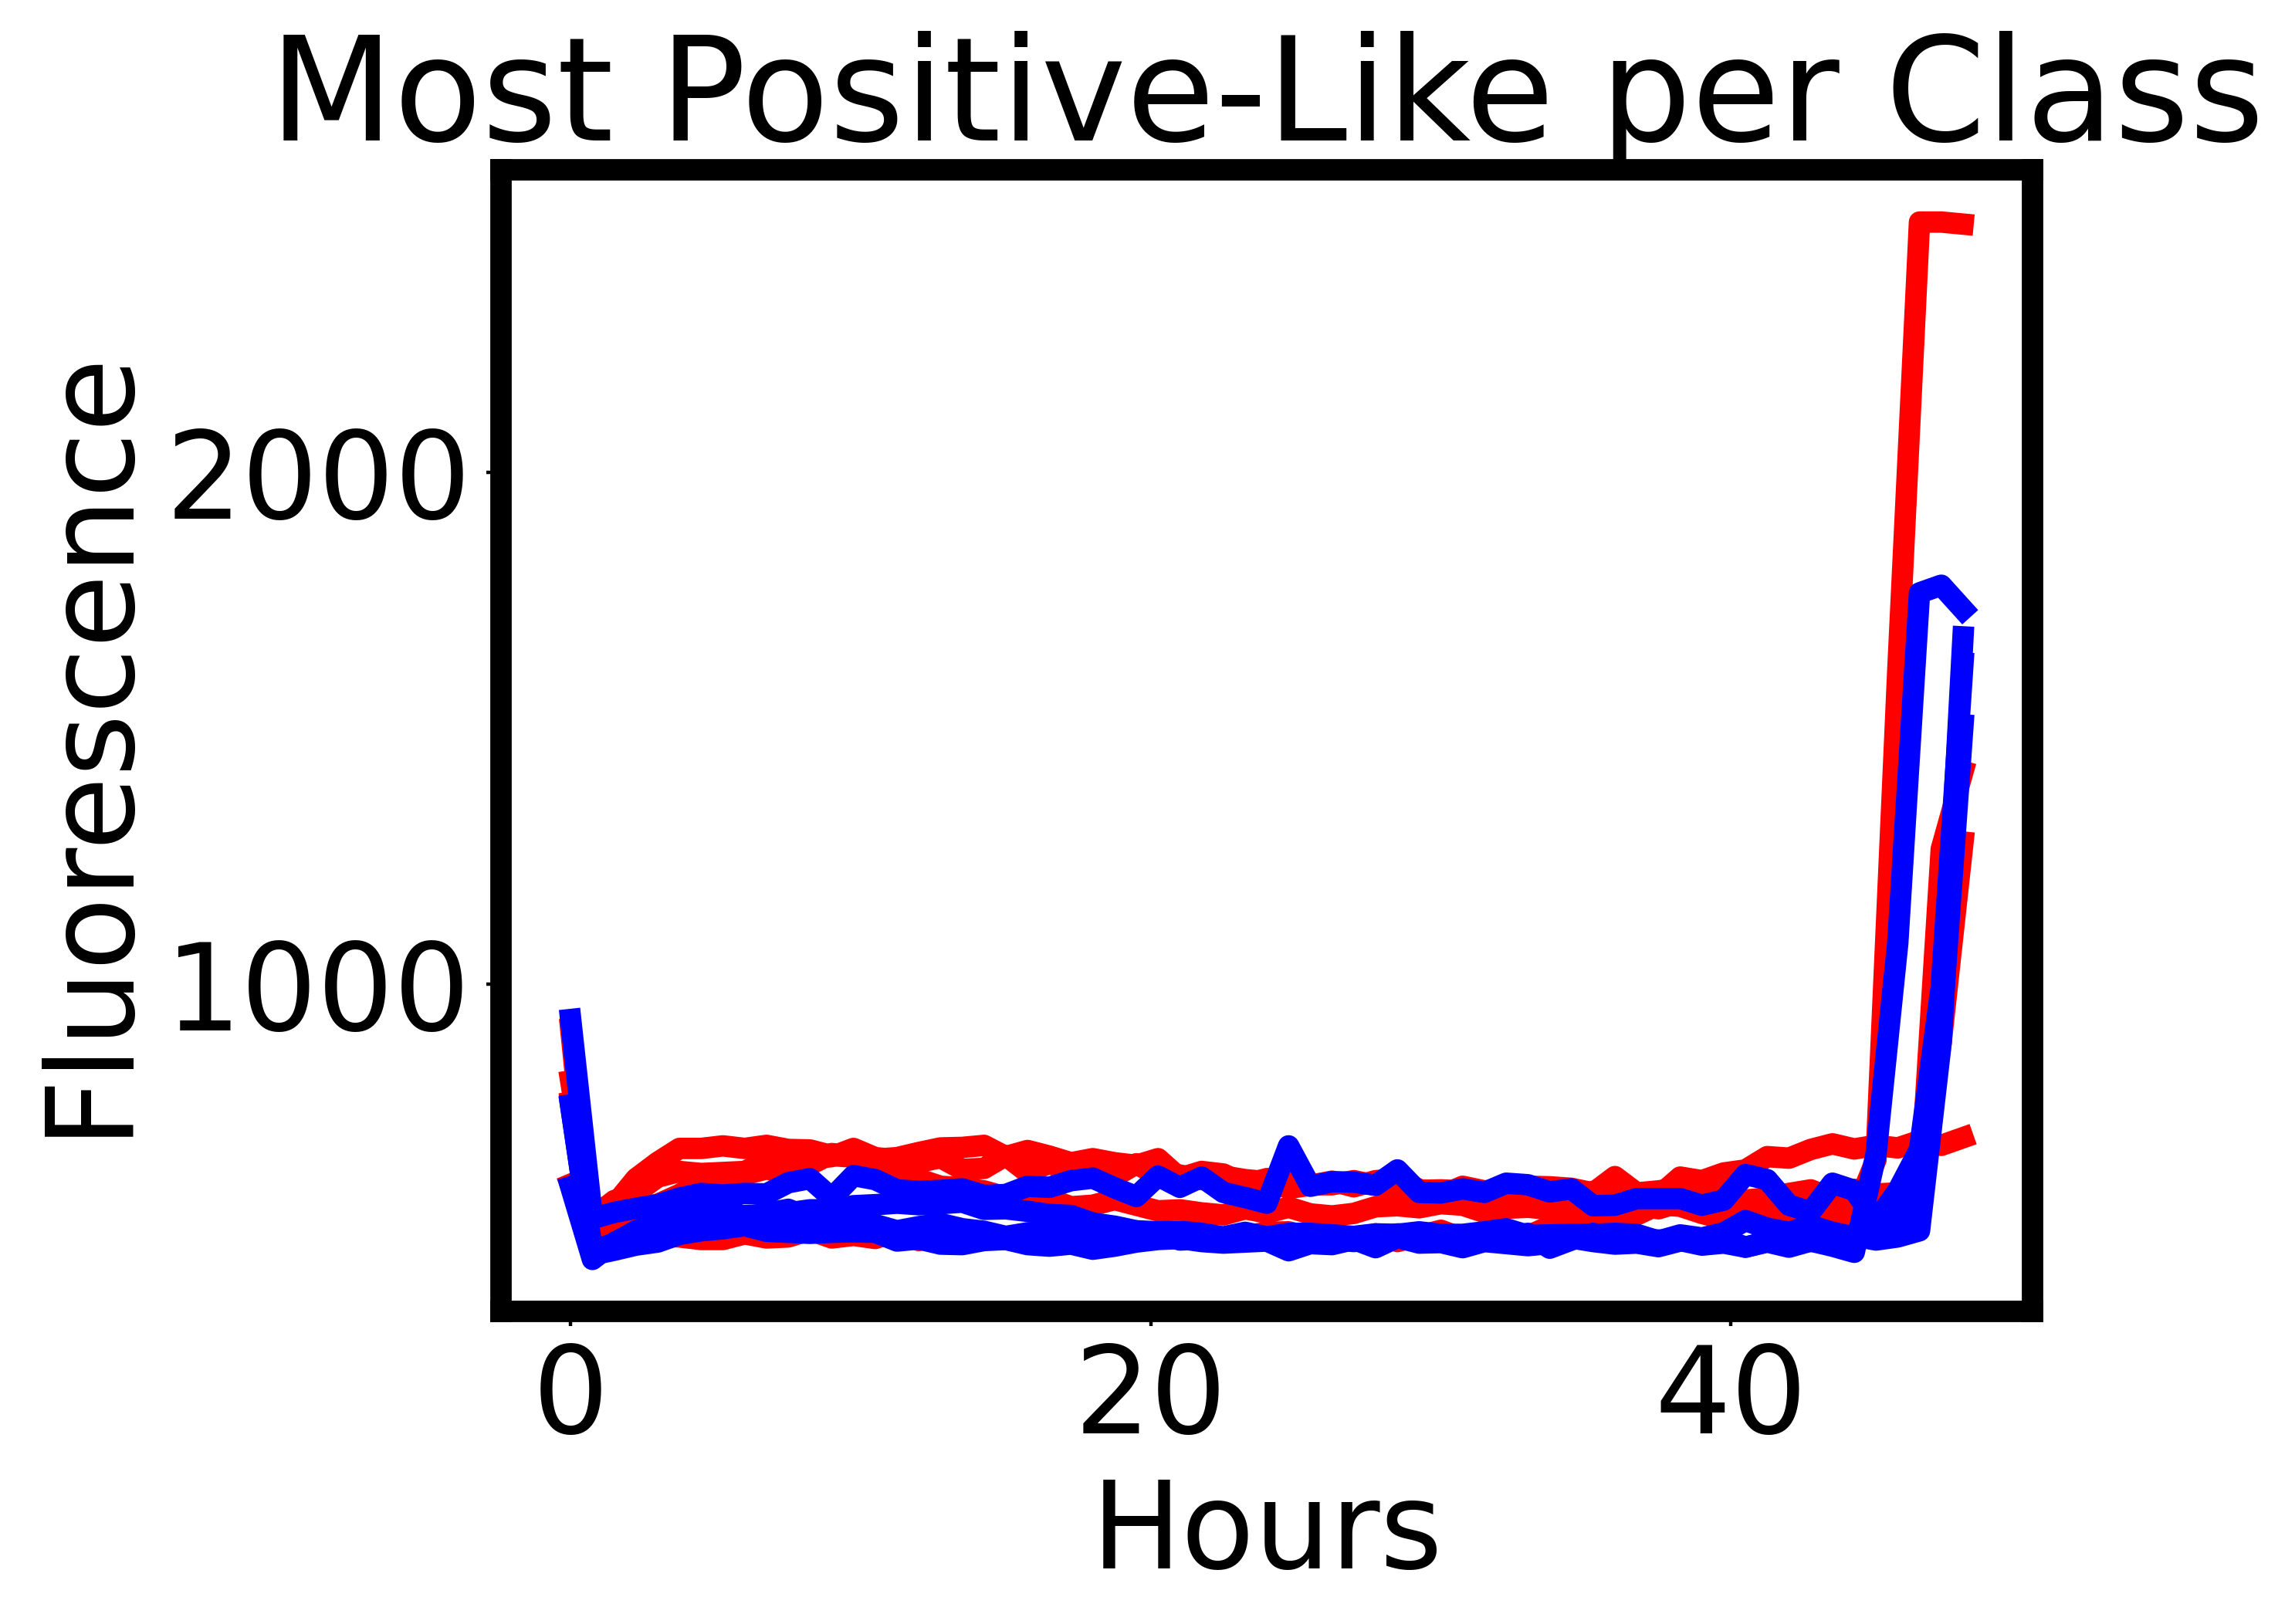

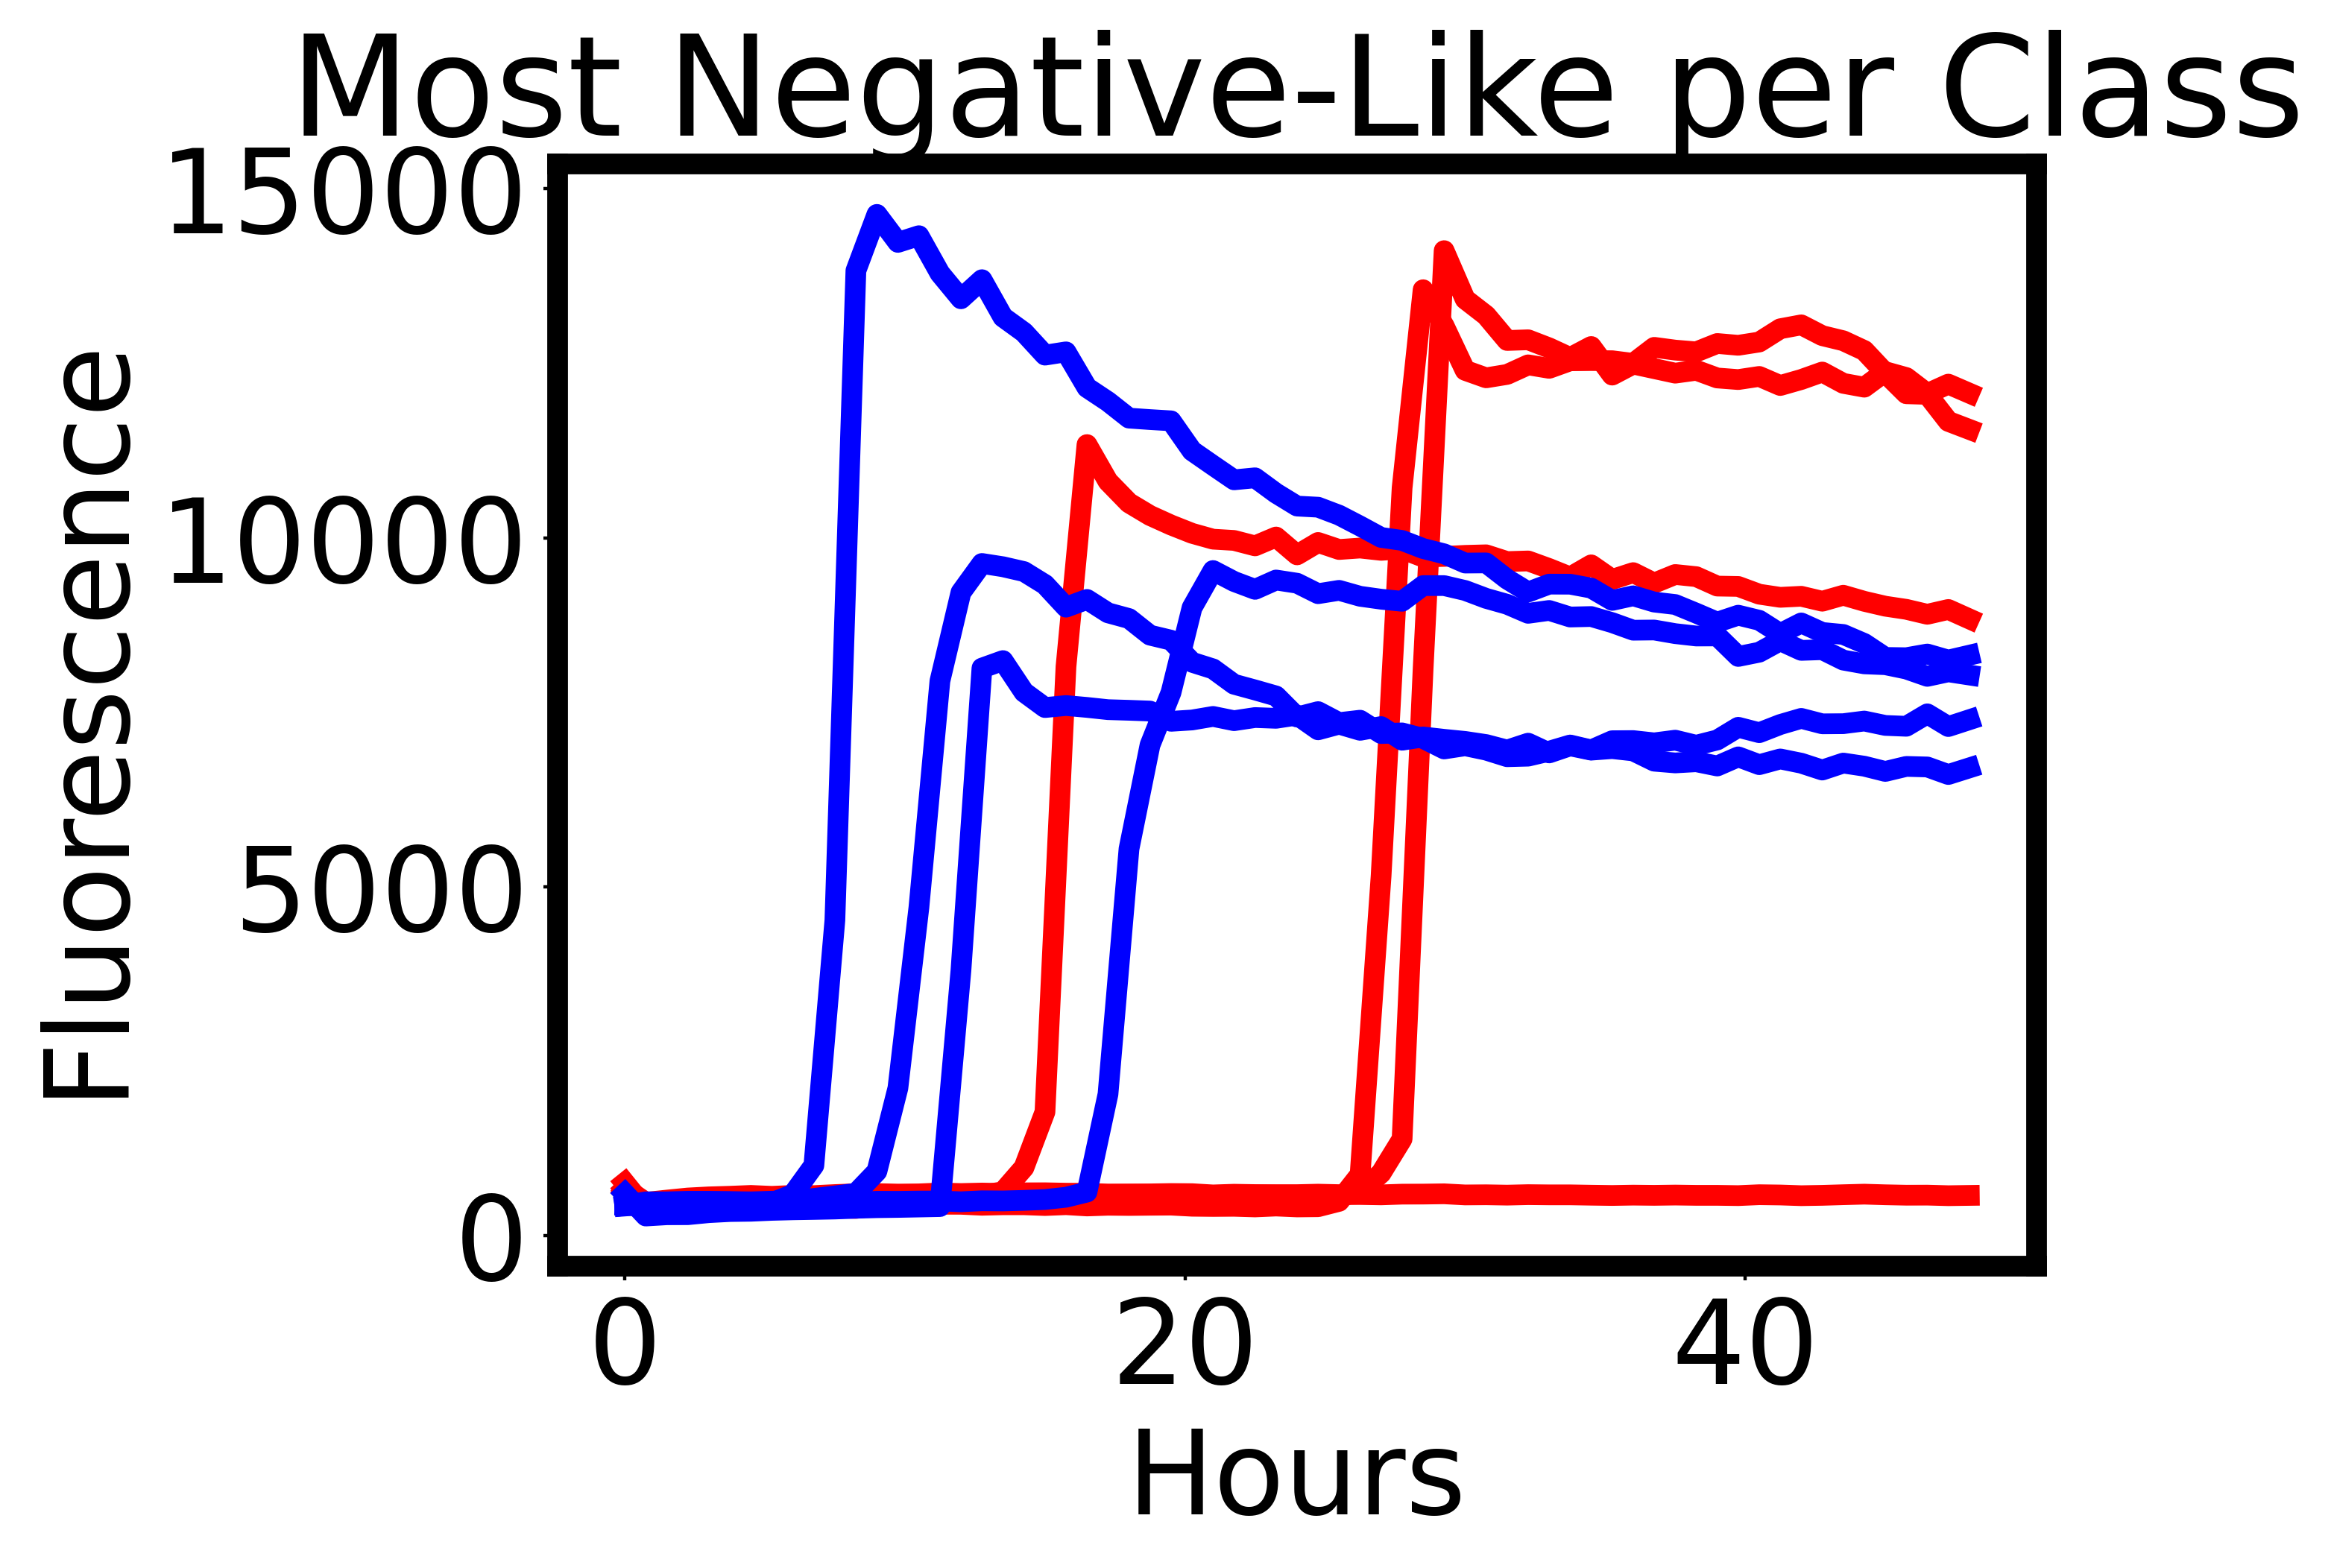

In [17]:
### Plot Edge Cases
df = pd.read_csv('./Data/GrinderClean/combined_raw.csv')

## Raw Data
# Plot Negative-Like Samples
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '308G_7'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '122Gx01_3'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '15KB_2'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '259Gx01_6'].drop(columns='content_replicate')), c = 'red')

plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '428Gx01_7'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '163Gx01_4'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '159Gx01_2'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '266Gx01_8'].drop(columns='content_replicate')), c = 'b')

plt.title('Most Positive-Like per Class')
plt.ylabel('Fluorescence')
plt.xlabel('Hours')
plt.show()

# Plot Positive-Like Samples
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '6Px01_4'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '123G_1'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '38Gx01_3'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '123G_4'].drop(columns='content_replicate')), c = 'red')

plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '70Px01_3'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '70Px02_4'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '65Px01_1'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '367G_1'].drop(columns='content_replicate')), c = 'b')

plt.title('Most Negative-Like per Class')
plt.ylabel('Fluorescence')
plt.xlabel('Hours')
plt.show()


## Metrics Data
# Plot Negative-Like Samples
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '391G_4'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '13KB_1'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '15KB_3'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '249x01_7'].drop(columns='content_replicate')), c = 'red')

plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '309KB_1'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '309KB_4'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '308KB_3'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '19G_5'].drop(columns='content_replicate')), c = 'b')

plt.title('Most Positive-Like per Class')
plt.ylabel('Fluorescence')
plt.xlabel('Hours')
plt.show()

# Plot Positive-Like Samples
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '72Px03_3'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '453Gx01_2'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '21Px03_2'].drop(columns='content_replicate')), c = 'red')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '18Px03_3'].drop(columns='content_replicate')), c = 'red')

plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '61GC_1'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '31G_6'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '97Gx01_5'].drop(columns='content_replicate')), c = 'b')
plt.plot(np.arange(65) * 0.75, np.squeeze(df.loc[df['content_replicate'] == '55GCx01_2'].drop(columns='content_replicate')), c = 'b')

plt.title('Most Negative-Like per Class')
plt.ylabel('Fluorescence')
plt.xlabel('Hours')
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('./SavedModels/Raw/mlp.h5')
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
